<a href="https://colab.research.google.com/github/RinHere/DATA_INTERN/blob/main/TIMA_TASK6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("ƒê√£ t·∫£i th√†nh c√¥ng:", file_name)
print("S·ªë d√≤ng:", df.shape[0], "| S·ªë c·ªôt:", df.shape[1])
df.head()


Saving Tima_CRM_with_ThoiGianVay_Thang.csv to Tima_CRM_with_ThoiGianVay_Thang.csv
ƒê√£ t·∫£i th√†nh c√¥ng: Tima_CRM_with_ThoiGianVay_Thang.csv
S·ªë d√≤ng: 2381 | S·ªë c·ªôt: 51


stt  sotiendkvaybandau  tiengiaingan  sotienconlai application_date  \
0  3.0         10000000.0      250000.0     9750000.0       2016-07-28   
1  4.0          5000000.0     5000000.0           0.0       2016-06-29   
2  6.0         10000000.0    10000000.0           0.0       2016-08-05   
3  7.0         10000000.0    10000000.0           0.0       2016-06-29   
4  8.0          7000000.0     7000000.0           0.0       2016-07-07   

   ts_credit_score_v2  s·ªë_di·ªán_tho·∫°i_kh√°ch_h√†ng    fromdate   id  loanid  ...  \
0                 403                 977966899  2016-07-28  226   38665  ...   
1                 531                 397511119  2016-06-29   45   38665  ...   
2                 675                 966710180  2016-08-05  293   38665  ...   
3                 675                 966710180  2016-06-29   66   38665  ...   
4                 582                 963609962  2016-07-07  102   38665  ...   

                                          creditinfo              name  \
0  kh√°ch h√†ng hi·ªán kh√¥ng c√≥ quan h·ªá t·∫°i tctd, kh√¥...  NGUY·ªÑN TH·ªä THANH   
1  kh√°ch h√†ng hi·ªán kh√¥ng c√≥ quan h·ªá t·∫°i tctd, kh√¥...    DAO CONG QUYET   
2  kh√°ch h√†ng hi·ªán kh√¥ng c√≥ quan h·ªá t·∫°i tctd, kh√¥...     ƒê√ÄO NG·ªåC LINH   
3  kh√°ch h√†ng hi·ªán kh√¥ng c√≥ quan h·ªá t·∫°i tctd, kh√¥...     ƒê√ÄO NG·ªåC LINH   
4  kh√°ch h√†ng hi·ªán kh√¥ng c√≥ quan h·ªá t·∫°i tctd, kh√¥...     DO MINH TRANG   

                                             address            checktime  \
0  288 T·ªî 36 NG√ï 405,.,NG·ªåC TH·ª§Y,NG·ªåC TH·ª§Y,LONG B...  2019-03-17 11:22:15   
1                  P203-E9 PHUONG MAI,DONG DA,HA NOI  2019-03-17 08:29:24   
2  -, TT C·ª§C KH√ç T∆Ø·ª¢NG TH·ª¶Y VƒÇN, TRUNG LI·ªÜT, Q.ƒê·ªê...  2019-03-17 14:14:22   
3  -, TT C·ª§C KH√ç T∆Ø·ª¢NG TH·ª¶Y VƒÇN, TRUNG LI·ªÜT, Q.ƒê·ªê...  2019-03-17 14:14:22   
4           227 NGO CHO KHAM THIEN DONG DA HA NOI VN  2019-03-17 12:21:17   

     brieft numberofloans  hasbaddebt  haslatepayment ThoiGianVay  \
0  notfound           1.0           0               0         0.7   
1         0           0.0           0               0         0.4   
2         0           0.0           0               0         0.3   
3         0           0.0           0               0         0.1   
4         0           0.0           0               0         0.7   

  ThoiGianVay_Thang  
0               8.0  
1               5.5  
2               4.0  
3               1.0  
4               8.0  

[5 rows x 51 columns]

In [ ]:
import re
import unicodedata
import pandas as pd

def strip_accents(s: str) -> str:
    if not isinstance(s, str):
        s = str(s)
    s = unicodedata.normalize('NFD', s)
    s = ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')
    return s

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)      # thay m·ªçi k√Ω t·ª± l·∫° b·∫±ng "_"
    s = re.sub(r"_+", "_", s).strip("_")   # g·ªçn d·∫•u "_"
    return s

orig_cols = df.columns.tolist()
norm_map = {c: normalize_colname(c) for c in orig_cols}

alias_to_canonical = {
    "tiengiaingan": "TienGiaiNgan",
    "tien_giai_ngan": "TienGiaiNgan",
    "disbursedamount": "TienGiaiNgan",
    "amountdisbursed": "TienGiaiNgan",
    "tien_gn": "TienGiaiNgan",

    "sotiendkvaybandau": "SoTienDKVayBanDau",
    "so_tien_dk_vay_ban_dau": "SoTienDKVayBanDau",
    "initialloanamount": "SoTienDKVayBanDau",
    "requestedamount": "SoTienDKVayBanDau",

    "trangthai": "Tr·∫°ng th√°i",
    "trang_thai": "Tr·∫°ng th√°i",
    "status": "Tr·∫°ng th√°i",
    "loanstatus": "Tr·∫°ng th√°i",

    "ts_credit_score_v2": "TS_CREDIT_SCORE_V2",


    "salary": "Salary",

    "jobname": "JobName",

    "cityname": "CityName",
    "districtname": "DistrictName",

    "hinh_thuc_cu_tru": "H√¨nh th·ª©c c∆∞ tr√∫",
    "hinhthuccutru": "H√¨nh th·ª©c c∆∞ tr√∫",

    "gender": "Gender",

    "birthday": "Birthday",
}

rename_dict = {}
for orig, normed in norm_map.items():
    if normed in alias_to_canonical:
        rename_dict[orig] = alias_to_canonical[normed]

if rename_dict:
    df.rename(columns=rename_dict, inplace=True)

print(" ƒê√£ chu·∫©n ho√° & ƒë·ªïi t√™n m·ªôt s·ªë c·ªôt:")
for k, v in rename_dict.items():
    print(f"- {k}  ->  {v}")

print("\n Danh s√°ch c·ªôt sau chu·∫©n ho√°/ƒë·ªïi t√™n:")
print(df.columns.tolist())


 ƒê√£ chu·∫©n ho√° & ƒë·ªïi t√™n m·ªôt s·ªë c·ªôt:
- sotiendkvaybandau  ->  SoTienDKVayBanDau
- tiengiaingan  ->  TienGiaiNgan
- ts_credit_score_v2  ->  TS_CREDIT_SCORE_V2
- ti·ªÅn_gi·∫£i_ng√¢n  ->  TienGiaiNgan
- tr·∫°ng_th√°i  ->  Tr·∫°ng th√°i
- gender  ->  Gender
- birthday  ->  Birthday
- cityname  ->  CityName
- districtname  ->  DistrictName
- h√¨nh_th·ª©c_c∆∞_tr√∫  ->  H√¨nh th·ª©c c∆∞ tr√∫
- jobname  ->  JobName
- salary  ->  Salary

 Danh s√°ch c·ªôt sau chu·∫©n ho√°/ƒë·ªïi t√™n:
['stt', 'SoTienDKVayBanDau', 'TienGiaiNgan', 'sotienconlai', 'application_date', 'TS_CREDIT_SCORE_V2', 's·ªë_di·ªán_tho·∫°i_kh√°ch_h√†ng', 'fromdate', 'id', 'loanid', 's·ªë_ti·ªÅn_dƒÉng_k√Ω_vay_ban_d·∫ßu', 'TienGiaiNgan', 'ti·ªÅn_g·ªëc_c√≤n_l·∫°i', 'todate', 'Tr·∫°ng th√°i', 'fullname', 'cardnumber', 'Gender', 'Birthday', 'CityName', 'DistrictName', 'wardname', 'H√¨nh th·ª©c c∆∞ tr√∫', 'th·ªùi_gian_d√£_s·ªëng', 'street', 'citynamehousehold', 'districtnamehousehold', 'wardnamehousehold', 'JobName', 'n

D√πng c·ªôt: 'TienGiaiNgan' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà 100.0%)


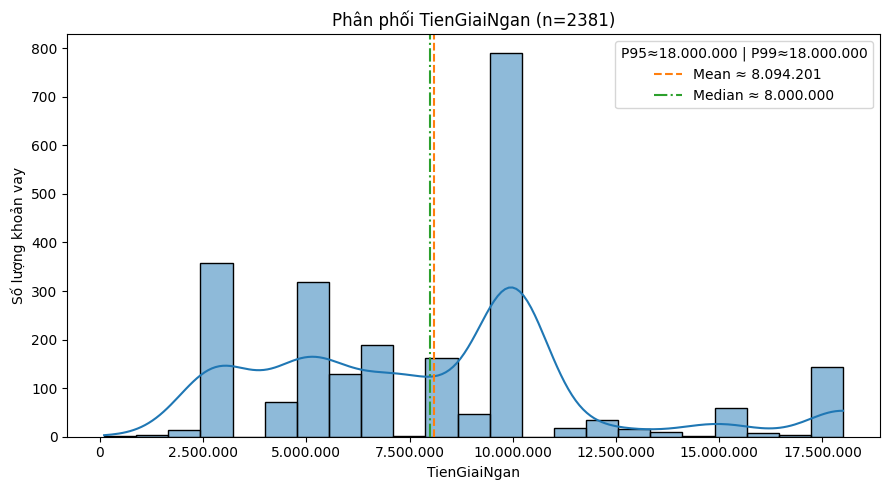

 Th·ªëng k√™ nhanh:
- Count : 2381
- Mean  : 8.094.200.76
- Median: 8.000.000.00
- P95   : 18.000.000.00
- P99   : 18.000.000.00


In [ ]:
#ƒê∆†N BI·∫æN
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import FuncFormatter

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

normalized = [normalize_colname(c) for c in df.columns]
target_keys = {"tiengiaingan","tien_giai_ngan","disbursedamount","amountdisbursed","tien_gn"}
candidate_idx = [i for i, key in enumerate(normalized) if key in target_keys]

if not candidate_idx:
    print(" Kh√¥ng t√¨m th·∫•y c·ªôt t∆∞∆°ng ·ª©ng v·ªõi 'TienGiaiNgan'. In th·ª≠ c·ªôt ƒë·ªÉ ki·ªÉm tra:")
    print(df.columns.tolist()[:30])
else:
    best_i, best_score, best_series = None, -1, None
    for i in candidate_idx:
        ser = df.iloc[:, i]
        conv = pd.to_numeric(ser.astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")
        score = conv.notna().mean()
        if score > best_score:
            best_i, best_score, best_series = i, score, conv

    chosen_name = df.columns[best_i]
    s = best_series.dropna()
    if s.empty:
        print(f" C·ªôt '{chosen_name}' kh√¥ng c√≥ gi√° tr·ªã s·ªë h·ª£p l·ªá ƒë·ªÉ v·∫Ω.")
    else:
        print(f"D√πng c·ªôt: '{chosen_name}' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà {best_score:.1%})")
        n = len(s)
        mean_val, median_val = s.mean(), s.median()
        p95, p99 = s.quantile(0.95), s.quantile(0.99)

        def thousands(x, _):
            try: return f"{int(x):,}".replace(",", ".")
            except: return x

        iqr = np.subtract(*np.percentile(s, [75, 25]))
        bin_width = 2 * iqr * (n ** (-1/3)) if iqr > 0 else None
        bins = int(np.clip((s.max() - s.min()) / bin_width, 10, 80)) if bin_width else 40

        plt.figure(figsize=(9,5))
        sns.histplot(s, bins=bins, kde=True)
        plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands))
        plt.title(f"Ph√¢n ph·ªëi {chosen_name} (n={n})")
        plt.xlabel(chosen_name); plt.ylabel("S·ªë l∆∞·ª£ng kho·∫£n vay")
        plt.axvline(mean_val, color="tab:orange", linestyle="--", linewidth=1.5, label=f"Mean ‚âà {mean_val:,.0f}".replace(",", "."))
        plt.axvline(median_val, color="tab:green", linestyle="-.", linewidth=1.5, label=f"Median ‚âà {median_val:,.0f}".replace(",", "."))
        plt.legend(title=f"P95‚âà{p95:,.0f} | P99‚âà{p99:,.0f}".replace(",", "."), loc="upper right")
        plt.tight_layout(); plt.show()

        print(" Th·ªëng k√™ nhanh:")
        print(f"- Count : {n}")
        print(f"- Mean  : {mean_val:,.2f}".replace(",", "."))
        print(f"- Median: {median_val:,.2f}".replace(",", "."))
        print(f"- P95   : {p95:,.2f}".replace(",", "."))
        print(f"- P99   : {p99:,.2f}".replace(",", "."))


NH·∫¨N X√âT:
- C·ªôt s·ª≠ d·ª•ng: TienGiaiNgan
*  H√¨nh d·∫°ng: L·ªách ph·∫£i nh·∫π, c√≥ nhi·ªÅu c·ª•m gi√° tr·ªã r√µ r·ªát (kho·∫£ng 2.5 tri·ªáu ‚Äì 10 tri·ªáu ƒë·ªìng) v√† m·ªôt v√†i ƒëi·ªÉm cao ·ªü v√πng 18 tri·ªáu.
*  Trung t√¢m ph√¢n ph·ªëi: Mean ‚âà 8.094.200, Median ‚âà 8.000.000 ‚Üí r·∫•t g·∫ßn nhau, cho th·∫•y ph√¢n ph·ªëi kh√° c√¢n b·∫±ng quanh 8 tri·ªáu ƒë·ªìng.
*   Ng∆∞·ª°ng cao: P95 ‚âà 18.000.000, P99 ‚âà 18.000.000 ‚Üí ch·ªâ kho·∫£ng 1‚Äì5% kho·∫£n vay c√≥ gi√° tr·ªã tr√™n 18 tri·ªáu ƒë·ªìng.
*   Outlier/ƒê·ªô ph√¢n t√°n: C√≥ m·ªôt v√†i gi√° tr·ªã l·ªõn (‚â•18 tri·ªáu) nh∆∞ng chi·∫øm t·ª∑ tr·ªçng nh·ªè, kh√¥ng g√¢y l·ªách m·∫°nh to√†n b·ªô ph√¢n ph·ªëi.


√ù nghƒ©a kinh doanh:
*   Ph·∫ßn l·ªõn kh√°ch h√†ng vay trong kho·∫£ng 5‚Äì10 tri·ªáu ƒë·ªìng, ƒë√¢y l√† ph√¢n kh√∫c ch√≠nh c·ªßa danh m·ª•c t√≠n d·ª•ng TIMA.
*   M·ªôt nh√≥m nh·ªè (~5%) vay tr√™n 18 tri·ªáu c√≥ th·ªÉ l√† c√°c kho·∫£n vay c·∫ßm c·ªë t√†i s·∫£n l·ªõn h∆°n ‚Äì c·∫ßn ƒë∆∞·ª£c ki·ªÉm so√°t r·ªßi ro k·ªπ h∆°n trong qu√° tr√¨nh th·∫©m ƒë·ªãnh.
*   Ph√¢n kh√∫c 8 tri·ªáu (median) l√† ƒëi·ªÉn h√¨nh, n√™n TIMA c√≥ th·ªÉ t·∫≠p trung t·ªëi ∆∞u quy tr√¨nh v√† marketing cho nh√≥m n√†y ƒë·ªÉ tƒÉng hi·ªáu su·∫•t gi·∫£i ng√¢n.

 D√πng c·ªôt: 'TienGiaiNgan' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà 100.0%)


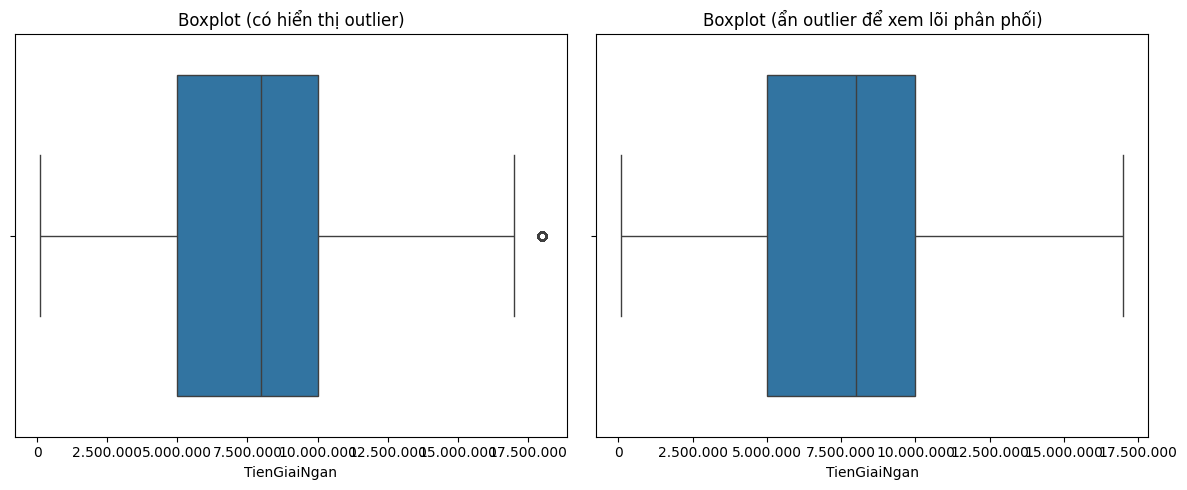

 Th·ªëng k√™ Boxplot:
- n      : 2381
- Q1     : 5.000.000
- Median : 8.000.000
- Q3     : 10.000.000
- IQR    : 5.000.000
- Lower whisker (Q1-1.5*IQR): -2.500.000
- Upper whisker (Q3+1.5*IQR): 17.500.000
- P95    : 18.000.000
- P99    : 18.000.000
- S·ªë l∆∞·ª£ng outlier: 143 (6.01%)

Top 10 gi√° tr·ªã l·ªõn nh·∫•t:
      TienGiaiNgan  rank
2372    18000000.0     1
2371    18000000.0     2
2348    18000000.0     3
2369    18000000.0     4
2365    18000000.0     5
1076    18000000.0     6
1075    18000000.0     7
1074    18000000.0     8
1060    18000000.0     9
2329    18000000.0    10


In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import FuncFormatter

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

normalized = [normalize_colname(c) for c in df.columns]
target_keys = {"tiengiaingan","tien_giai_ngan","disbursedamount","amountdisbursed","tien_gn"}
candidate_idx = [i for i, key in enumerate(normalized) if key in target_keys]

if not candidate_idx:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt t∆∞∆°ng ·ª©ng v·ªõi 'TienGiaiNgan'. H√£y ch·∫°y cell chu·∫©n ho√° c·ªôt tr∆∞·ªõc.")

best_i, best_score, s = None, -1, None
for i in candidate_idx:
    ser = df.iloc[:, i]
    conv = pd.to_numeric(ser.astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")
    score = conv.notna().mean()
    if score > best_score:
        best_i, best_score, s = i, score, conv.dropna()

col_name = df.columns[best_i]
print(f" D√πng c·ªôt: '{col_name}' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà {best_score:.1%})")

if s.empty:
    raise ValueError(f"C·ªôt '{col_name}' kh√¥ng c√≥ gi√° tr·ªã s·ªë h·ª£p l·ªá ƒë·ªÉ v·∫Ω.")

q1, q2, q3 = s.quantile(0.25), s.quantile(0.5), s.quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
outliers = s[(s < lower_whisker) | (s > upper_whisker)]
p95, p99 = s.quantile(0.95), s.quantile(0.99)

def thousands(x, _):
    try: return f"{int(x):,}".replace(",", ".")
    except: return x

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(x=s, ax=axes[0], showfliers=True)
axes[0].xaxis.set_major_formatter(FuncFormatter(thousands))
axes[0].set_title("Boxplot (c√≥ hi·ªÉn th·ªã outlier)")
axes[0].set_xlabel(col_name)

sns.boxplot(x=s, ax=axes[1], showfliers=False)
axes[1].xaxis.set_major_formatter(FuncFormatter(thousands))
axes[1].set_title("Boxplot (·∫©n outlier ƒë·ªÉ xem l√µi ph√¢n ph·ªëi)")
axes[1].set_xlabel(col_name)

plt.tight_layout()
plt.show()

print(" Th·ªëng k√™ Boxplot:")
print(f"- n      : {len(s)}")
print(f"- Q1     : {q1:,.0f}".replace(",", "."))
print(f"- Median : {q2:,.0f}".replace(",", "."))
print(f"- Q3     : {q3:,.0f}".replace(",", "."))
print(f"- IQR    : {iqr:,.0f}".replace(",", "."))
print(f"- Lower whisker (Q1-1.5*IQR): {lower_whisker:,.0f}".replace(",", "."))
print(f"- Upper whisker (Q3+1.5*IQR): {upper_whisker:,.0f}".replace(",", "."))
print(f"- P95    : {p95:,.0f}".replace(",", "."))
print(f"- P99    : {p99:,.0f}".replace(",", "."))
print(f"- S·ªë l∆∞·ª£ng outlier: {outliers.shape[0]} ({outliers.shape[0]/len(s):.2%})")

top_out = s.sort_values(ascending=False).head(10)
print("\nTop 10 gi√° tr·ªã l·ªõn nh·∫•t:")
print(top_out.to_frame(name=col_name).assign(rank=lambda x: range(1, len(x)+1)))


***Nh·∫≠n x√©t ‚Äì Boxplot TienGiaiNgan***


C·ªôt s·ª≠ d·ª•ng: TienGiaiNgan

Th·ªëng k√™ ch√≠nh:

- Q1 = 5.000.000
- Median = 8.000.000
- Q3 = 10.000.000
- IQR = 5.000.000
- Lower whisker = -2.500.000 (do Q1 - 1.5*IQR, nh∆∞ng th·ª±c t·∫ø kh√¥ng c√≥ kho·∫£n √¢m ‚Üí c·∫Øt v·ªÅ 0)
- Upper whisker = 17.500.000
- P95 = 18.000.000, P99 = 18.000.000
- Outlier: 143 kho·∫£n vay (‚âà6,0%) v∆∞·ª£t qu√° 17,5 tri·ªáu ƒë·ªìng.
***Quan s√°t t·ª´ boxplot:***

- Ph·∫ßn l√µi d·ªØ li·ªáu (t·ª´ 5‚Äì10 tri·ªáu) chi·∫øm kho·∫£ng 50% danh m·ª•c ‚Üí t·∫≠p trung r·∫•t r√µ quanh m·ª©c 8 tri·ªáu ƒë·ªìng.
- C√≥ m·ªôt s·ªë ƒëi·ªÉm ngo√†i (outlier) ·ªü m·ª©c ~18 tri·ªáu ƒë·ªìng, tr√πng v·ªõi ng∆∞·ª°ng P95‚ÄìP99, cho th·∫•y c√≥ √≠t kho·∫£n vay gi√° tr·ªã cao b·∫•t th∆∞·ªùng.
***√ù nghƒ©a kinh doanh:***

- Ph√¢n kh√∫c vay nh·ªè‚Äìtrung b√¨nh (5‚Äì10 tri·ªáu) l√† ph·ªï bi·∫øn nh·∫•t v√† ƒë·∫°i di·ªán cho ph·∫ßn l·ªõn kh√°ch h√†ng TIMA.
- C√°c kho·∫£n vay l·ªõn h∆°n 17,5 tri·ªáu (‚âà6%) l√† nh√≥m c√≥ th·ªÉ mang l·∫°i doanh thu cao h∆°n nh∆∞ng c≈©ng ti·ªÅm ·∫©n r·ªßi ro t√≠n d·ª•ng cao ‚Üí n√™n ki·ªÉm so√°t k·ªπ ·ªü kh√¢u th·∫©m ƒë·ªãnh v√† ƒë·ªãnh gi√° t√†i s·∫£n.
- Kho·∫£n median 8 tri·ªáu l√† m·ª©c ƒëi·ªÉn h√¨nh ‚Üí c√≥ th·ªÉ d√πng l√†m chu·∫©n ƒë·ªÉ thi·∫øt k·∫ø g√≥i vay ti√™u chu·∫©n, t·ªëi ∆∞u quy tr√¨nh v√† t·ªëc ƒë·ªô gi·∫£i ng√¢n.



 D√πng c·ªôt: 'SoTienDKVayBanDau' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà 100.0%)


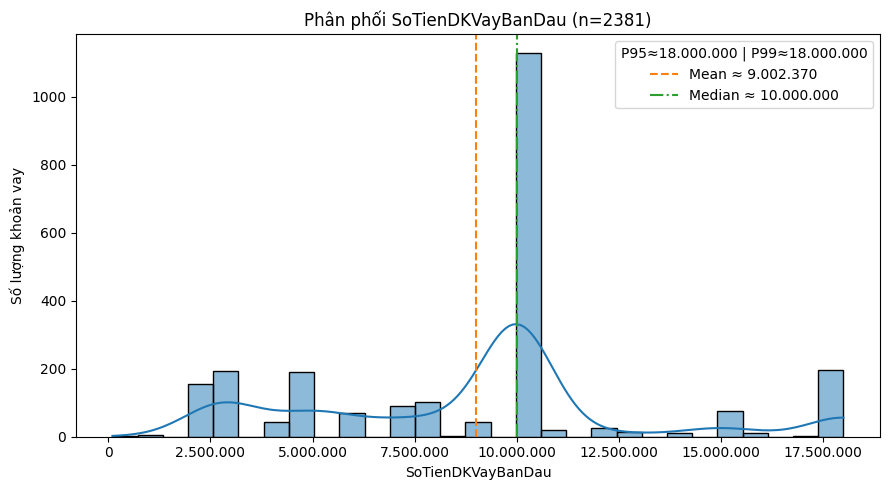

 Th·ªëng k√™ nhanh:
- Count : 2381
- Mean  : 9.002.369.59
- Median: 10.000.000.00
- P95   : 18.000.000.00
- P99   : 18.000.000.00


In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import FuncFormatter

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

normalized = [normalize_colname(c) for c in df.columns]
target_keys = {
    "sotiendkvaybandau", "so_tien_dk_vay_ban_dau",
    "so_tien_dang_ky_vay_ban_dau", "requestedamount",
    "initialloanamount", "requested_amount", "initial_loan_amount",
    "so_tien_vay_ban_dau", "so_tien_dang_ky"
}
candidate_idx = [i for i, key in enumerate(normalized) if key in target_keys]

if not candidate_idx:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt t∆∞∆°ng ·ª©ng v·ªõi 'SoTienDKVayBanDau'. Ki·ªÉm tra l·∫°i t√™n c·ªôt trong df.columns.")

best_i, best_score, s = None, -1, None
for i in candidate_idx:
    ser = df.iloc[:, i]
    conv = pd.to_numeric(ser.astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")
    score = conv.notna().mean()
    if score > best_score:
        best_i, best_score, s = i, score, conv.dropna()

col_name = df.columns[best_i]
print(f" D√πng c·ªôt: '{col_name}' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà {best_score:.1%})")

if s.empty:
    raise ValueError(f"C·ªôt '{col_name}' kh√¥ng c√≥ gi√° tr·ªã s·ªë h·ª£p l·ªá ƒë·ªÉ v·∫Ω.")

n = len(s)
mean_val, median_val = s.mean(), s.median()
p95, p99 = s.quantile(0.95), s.quantile(0.99)

def thousands(x, _):
    try: return f"{int(x):,}".replace(",", ".")
    except: return x

iqr = np.subtract(*np.percentile(s, [75, 25]))
bin_width = 2 * iqr * (n ** (-1/3)) if iqr > 0 else None
bins = int(np.clip((s.max() - s.min()) / bin_width, 10, 80)) if bin_width else 40

plt.figure(figsize=(9,5))
sns.histplot(s, bins=bins, kde=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands))
plt.title(f"Ph√¢n ph·ªëi {col_name} (n={n})")
plt.xlabel(col_name); plt.ylabel("S·ªë l∆∞·ª£ng kho·∫£n vay")
plt.axvline(mean_val, color="tab:orange", linestyle="--", linewidth=1.5, label=f"Mean ‚âà {mean_val:,.0f}".replace(",", "."))
plt.axvline(median_val, color="tab:green", linestyle="-.", linewidth=1.5, label=f"Median ‚âà {median_val:,.0f}".replace(",", "."))
plt.legend(title=f"P95‚âà{p95:,.0f} | P99‚âà{p99:,.0f}".replace(",", "."), loc="upper right")
plt.tight_layout(); plt.show()

print(" Th·ªëng k√™ nhanh:")
print(f"- Count : {n}")
print(f"- Mean  : {mean_val:,.2f}".replace(",", "."))
print(f"- Median: {median_val:,.2f}".replace(",", "."))
print(f"- P95   : {p95:,.2f}".replace(",", "."))
print(f"- P99   : {p99:,.2f}".replace(",", "."))



 D√πng c·ªôt tr·∫°ng th√°i: 'Tr·∫°ng th√°i' (non-null ‚âà 100.0%)

 Ph√¢n ph·ªëi tr·∫°ng th√°i (t√≠nh tr√™n to√†n b·ªô t·∫≠p):


/tmp/ipython-input-2219229836.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  npl_flag = status_norm.str.contains(npl_pattern, regex=True)


Count  Percent_%
Tr·∫°ng th√°i                  
K·∫øt th√∫c     1585      66.57
ƒêang Vay      590      24.78
N·ª£ X·∫•u        206       8.65


üìå T·ª∑ l·ªá NPL ∆∞·ªõc t√≠nh (nh·∫≠n di·ªán theo t·ª´ kh√≥a): 8.65%


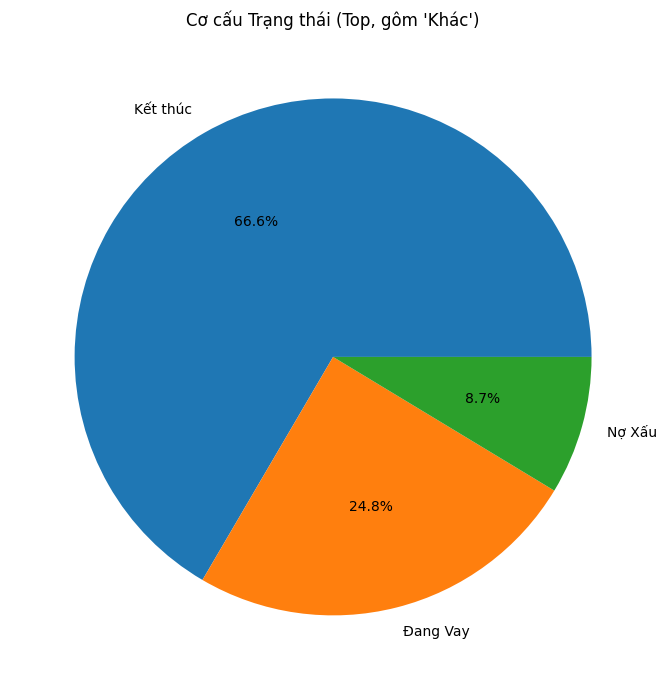

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases = {"trang_thai","trangthai","status","loanstatus","tinh_trang","tinhtrang"}
norm_names = [norm_col(c) for c in df.columns]
cand_idx = [i for i, nm in enumerate(norm_names) if nm in aliases]

if not cand_idx:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt t∆∞∆°ng ·ª©ng v·ªõi 'Tr·∫°ng th√°i' (trangthai/status/loanstatus/...). Ki·ªÉm tra df.columns.")

best_i, best_score = None, -1
for i in cand_idx:
    ser = df.iloc[:, i]
    score = ser.notna().mean()
    if score > best_score:
        best_i, best_score = i, score

col_status = df.columns[best_i]
print(f" D√πng c·ªôt tr·∫°ng th√°i: '{col_status}' (non-null ‚âà {best_score:.1%})")

status_raw = df[col_status].astype(str).str.strip()
status_norm = status_raw.apply(lambda x: norm_col(x))

npl_pattern = re.compile(r"(no_xau|no_xau_|no_xau$|no_xau\W|no\s*xau|bad|default|delinquent|npl)")

npl_flag = status_norm.str.contains(npl_pattern, regex=True)
npl_rate = npl_flag.mean()

vc = status_raw.replace({"nan":"NaN"})
vc_counts = vc.value_counts(dropna=False)
vc_perc = (vc_counts / len(df)).rename("Percent")
dist = pd.concat([vc_counts.rename("Count"), (vc_counts/len(df)*100).round(2).rename("Percent_%")], axis=1)

print("\n Ph√¢n ph·ªëi tr·∫°ng th√°i (t√≠nh tr√™n to√†n b·ªô t·∫≠p):")
display(dist)

print(f"\nüìå T·ª∑ l·ªá NPL ∆∞·ªõc t√≠nh (nh·∫≠n di·ªán theo t·ª´ kh√≥a): {npl_rate:.2%}")

topk = 8
vc_top = vc_counts.head(topk)
others = vc_counts.iloc[topk:].sum()
if others > 0:
    vc_top = vc_top.append(pd.Series({"Kh√°c": others}))

plt.figure(figsize=(7,7))
vc_top.plot(kind="pie", autopct="%.1f%%", ylabel="", title="C∆° c·∫•u Tr·∫°ng th√°i (Top, g√¥m 'Kh√°c')")
plt.tight_layout()
plt.show()


-  Pie chart Tr·∫°ng th√°i
* C·ªôt s·ª≠ d·ª•ng: Tr·∫°ng th√°i

***Ph√¢n ph·ªëi:***

- Tr·∫°ng th√°i	S·ªë l∆∞·ª£ng	T·ª∑ l·ªá (%)
- K·∫øt th√∫c	1.585	66.6%
- ƒêang vay	590	24.8%
- N·ª£ x·∫•u	206	8.7%
- T·ª∑ l·ªá NPL (n·ª£ x·∫•u) t·ªïng th·ªÉ: 8.65%

***Quan s√°t:***

- Ph·∫ßn l·ªõn c√°c kho·∫£n vay ƒë√£ k·∫øt th√∫c (‚âà 2/3 danh m·ª•c), cho th·∫•y danh m·ª•c c√≥ m·ª©c quay v√≤ng v·ªën cao.
- Kho·∫£ng 1/4 kho·∫£n vay ƒëang c√≤n hi·ªáu l·ª±c, ph·∫£n √°nh nh√≥m kh√°ch h√†ng hi·ªán t·∫°i ƒëang duy tr√¨ nghƒ©a v·ª• tr·∫£ n·ª£.
- 8.7 % kho·∫£n vay r∆°i v√†o tr·∫°ng th√°i ‚ÄúN·ª£ x·∫•u‚Äù, ƒë√¢y l√† m·ªôt t·ª∑ l·ªá ƒë√°ng ch√∫ √Ω c·∫ßn ƒë∆∞·ª£c ki·ªÉm so√°t ch·∫∑t ch·∫Ω.
***√ù nghƒ©a kinh doanh:***

- T·ª∑ l·ªá NPL ~ 8.6 % n·∫±m ·ªü m·ª©c trung b√¨nh‚Äìcao so v·ªõi th·ªã tr∆∞·ªùng cho vay ti√™u d√πng; ƒë√¢y l√† ch·ªâ b√°o r·ªßi ro t√≠n d·ª•ng quan tr·ªçng.
- TIMA n√™n ti·∫øp t·ª•c theo d√µi c√°c kho·∫£n ‚Äúƒêang vay‚Äù ƒë·ªÉ d·ª± b√°o nguy c∆° chuy·ªÉn nh√≥m n·ª£ x·∫•u, ƒë·ªìng th·ªùi ph√¢n t√≠ch ƒë·∫∑c ƒëi·ªÉm kh√°ch h√†ng trong nh√≥m n√†y ·ªü c√°c b∆∞·ªõc EDA k·∫ø ti·∫øp.
- Vi·ªác gi·ªØ t·ª∑ l·ªá n·ª£ x·∫•u < 10 % l√† m·ª•c ti√™u c·∫ßn ∆∞u ti√™n ƒë·ªÉ ƒë·∫£m b·∫£o hi·ªáu qu·∫£ t√†i ch√≠nh v√† uy t√≠n th∆∞∆°ng hi·ªáu.

 D√πng c·ªôt s·∫£n ph·∫©m: 'productcreditname' (non-null ‚âà 100.0%)

 Top 10 s·∫£n ph·∫©m theo s·ªë l∆∞·ª£ng kho·∫£n vay:


Count  Percent
productcreditname                     
c·∫ßm c·ªë ƒëi·ªán tho·∫°i        1109    46.58
c·∫ßm c·ªë xe m√°y             507    21.29
vay theo sim              298    12.52
c·∫ßm c·ªë ƒëi·ªán tho·∫°i hk      250    10.50
c·∫ßm c·ªë xe m√°y kcc         160     6.72
ƒëƒÉng k√Ω xe √¥ t√¥            40     1.68
√¥ t√¥ ng√¢n h√†ng              8     0.34
vay tr·ª±c tuy·∫øn qua sim      5     0.21
c·∫ßm sim s·ªë ƒë·∫πp              3     0.13
c·∫ßm √¥ t√¥                    1     0.04

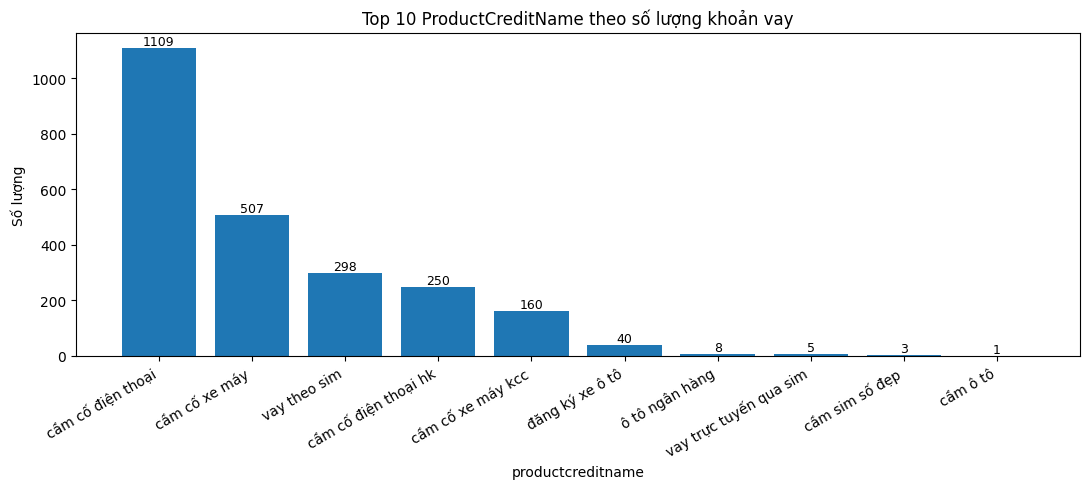

In [ ]:
import re, unicodedata, pandas as pd
import matplotlib.pyplot as plt

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases = {"productcreditname","product_credit_name","ten_san_pham","san_pham_tin_dung","product"}
norm_names = [norm_col(c) for c in df.columns]
cand_idx = [i for i, nm in enumerate(norm_names) if nm in aliases]

if not cand_idx:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt t∆∞∆°ng ·ª©ng v·ªõi 'ProductCreditName' (productcreditname/ten_san_pham/...). Ki·ªÉm tra df.columns.")

best_i, best_score = None, -1
for i in cand_idx:
    ser = df.iloc[:, i]
    score = ser.notna().mean()
    if score > best_score:
        best_i, best_score = i, score

col_prod = df.columns[best_i]
print(f" D√πng c·ªôt s·∫£n ph·∫©m: '{col_prod}' (non-null ‚âà {best_score:.1%})")

series = df[col_prod].fillna("NaN")
vc = series.value_counts()
topk = 10
top_tbl = (
    vc.head(topk)
      .to_frame("Count")
      .assign(Percent=lambda x: (x["Count"]/len(series)*100).round(2))
)

print("\n Top 10 s·∫£n ph·∫©m theo s·ªë l∆∞·ª£ng kho·∫£n vay:")
display(top_tbl)

plt.figure(figsize=(11,5))
bars = plt.bar(top_tbl.index.astype(str), top_tbl["Count"])
plt.title("Top 10 ProductCreditName theo s·ªë l∆∞·ª£ng kho·∫£n vay")
plt.xlabel(col_prod); plt.ylabel("S·ªë l∆∞·ª£ng")
plt.xticks(rotation=30, ha="right")

for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"{int(h)}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


Nh·∫≠n x√©t ‚Äì Bar chart ProductCreditName (Top 10 s·∫£n ph·∫©m theo s·ªë l∆∞·ª£ng kho·∫£n vay)
- C·ªôt s·ª≠ d·ª•ng: ProductCreditName

***Ph√¢n ph·ªëi Top 10 s·∫£n ph·∫©m:***
- S·∫£n ph·∫©m	S·ªë l∆∞·ª£ng	T·ª∑ l·ªá (%)
- C·∫ßm c·ªë ƒëi·ªán tho·∫°i	1.109	46.6%
- C·∫ßm c·ªë xe m√°y	507	21.3%
- Vay theo sim	298	12.5%
- C·∫ßm c·ªë ƒëi·ªán tho·∫°i HK	250	10.5%
- C·∫ßm c·ªë xe m√°y KCC	160	6.7%
- ƒêƒÉng k√Ω xe √¥ t√¥	40	1.68%
- √î t√¥ ng√¢n h√†ng	8	0.34%
- Vay tr·ª±c tuy·∫øn qua sim	5	0.21%
- C·∫ßm sim s·ªë ƒë·∫πp	3	0.13%
- C·∫ßm √¥ t√¥	1	0.04%

***Quan s√°t:***

- Hai s·∫£n ph·∫©m ‚ÄúC·∫ßm c·ªë ƒëi·ªán tho·∫°i‚Äù (46.6%) v√† ‚ÄúC·∫ßm c·ªë xe m√°y‚Äù (21.3%) chi·∫øm g·∫ßn 68% t·ªïng s·ªë kho·∫£n vay, th·ªÉ hi·ªán m·ª©c ƒë·ªô t·∫≠p trung r·∫•t cao v√†o nh√≥m vay c·∫ßm c·ªë t√†i s·∫£n ti√™u d√πng nh·ªè.
- C√°c s·∫£n ph·∫©m kh√°c nh∆∞ ‚ÄúVay theo sim‚Äù, ‚ÄúC·∫ßm c·ªë ƒëi·ªán tho·∫°i HK‚Äù, v√† ‚ÄúC·∫ßm c·ªë xe m√°y KCC‚Äù chi·∫øm t·ª∑ tr·ªçng nh·ªè h∆°n (5‚Äì12%), trong khi nh√≥m s·∫£n ph·∫©m v·ªÅ √¥ t√¥ g·∫ßn nh∆∞ kh√¥ng ƒë√°ng k·ªÉ (<2%).
- Ph√¢n ph·ªëi mang d·∫°ng ‚Äúlong-tail‚Äù ‚Äì m·ªôt v√†i s·∫£n ph·∫©m ch·ªß l·ª±c chi·∫øm ph·∫ßn l·ªõn doanh s·ªë, c√≤n l·∫°i l√† nh√≥m ph·ª•.

***√ù nghƒ©a kinh doanh:***

- TIMA hi·ªán ph·ª• thu·ªôc m·∫°nh v√†o 2 s·∫£n ph·∫©m ch·ªß l·ª±c l√† ‚ÄúC·∫ßm c·ªë ƒëi·ªán tho·∫°i‚Äù v√† ‚ÄúC·∫ßm c·ªë xe m√°y‚Äù.
- ∆Øu ƒëi·ªÉm: d·ªÖ m·ªü r·ªông, gi·∫£i ng√¢n nhanh, r·ªßi ro th·∫•p.
- R·ªßi ro: danh m·ª•c thi·∫øu ƒëa d·∫°ng, d·ªÖ b·ªã ·∫£nh h∆∞·ªüng n·∫øu nhu c·∫ßu ·ªü ph√¢n kh√∫c n√†y gi·∫£m.
- N√™n xem x√©t m·ªü r·ªông ho·∫∑c ƒë·∫©y m·∫°nh nh√≥m s·∫£n ph·∫©m ‚Äúvay theo sim‚Äù ‚Äì v·ªën chi·∫øm 12.5%, c√≥ ti·ªÅm nƒÉng ph√°t tri·ªÉn nh∆∞ng c·∫ßn c·∫£i thi·ªán marketing v√† quy tr√¨nh.
- C√°c s·∫£n ph·∫©m nh∆∞ ‚Äú√î t√¥ ng√¢n h√†ng‚Äù, ‚ÄúC·∫ßm √¥ t√¥‚Äù c·∫ßn ƒë∆∞·ª£c ƒë√°nh gi√° l·∫°i t√≠nh kh·∫£ thi v√¨ nhu c·∫ßu r·∫•t th·∫•p.


 D√πng c·ªôt ƒë·ªãa l√Ω: 'CityName' (non-null ‚âà 100.0%)

 Top 10 t·ªânh/th√†nh theo s·ªë l∆∞·ª£ng kho·∫£n vay/kh√°ch h√†ng:


Count  Percent
CityName                   
h√† n·ªôi        2058    86.43
h·ªì ch√≠ minh    292    12.26
ph√∫ th·ªç         10     0.42
h√≤a b√¨nh         6     0.25
vƒ©nh ph√∫c        4     0.17
thanh h√≥a        4     0.17
h·∫£i d∆∞∆°ng        1     0.04
b·∫Øc ninh         1     0.04
l√†o cai          1     0.04
h·∫£i ph√≤ng        1     0.04

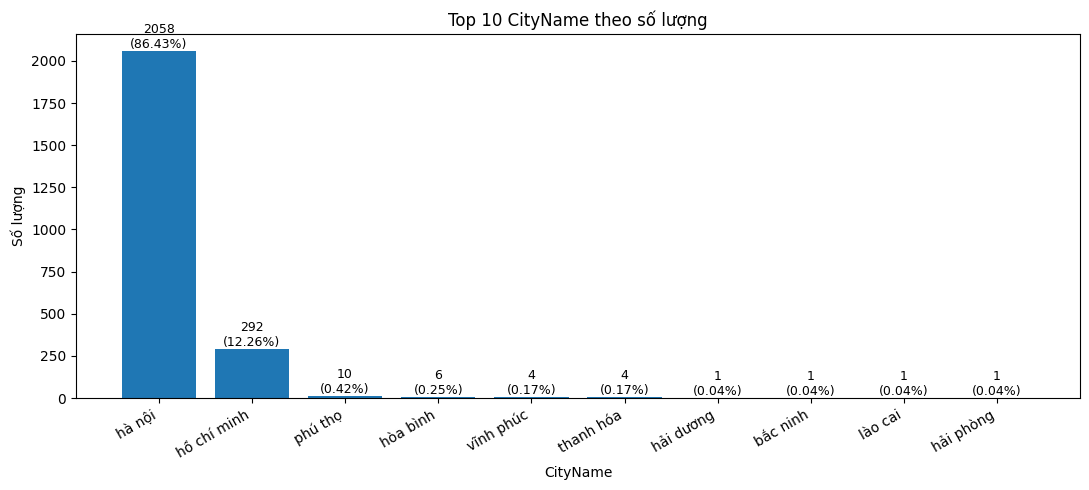

In [ ]:
import re, unicodedata, pandas as pd
import matplotlib.pyplot as plt

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases = {"cityname","city","tinh_thanh","tinh","thanh_pho","province","quan_huyen_tinh"}
norm_names = [norm_col(c) for c in df.columns]
cand_idx = [i for i, nm in enumerate(norm_names) if nm in aliases]
if not cand_idx:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt t∆∞∆°ng ·ª©ng v·ªõi 'CityName' (cityname/tinh_thanh/thanh_pho/...). Ki·ªÉm tra df.columns.")

best_i, best_score = None, -1
for i in cand_idx:
    ser = df.iloc[:, i]
    score = ser.notna().mean()
    if score > best_score:
        best_i, best_score = i, score

col_city = df.columns[best_i]
print(f" D√πng c·ªôt ƒë·ªãa l√Ω: '{col_city}' (non-null ‚âà {best_score:.1%})")

series = df[col_city].fillna("NaN")
vc = series.value_counts()
topk = 10
top_tbl = (
    vc.head(topk)
      .to_frame("Count")
      .assign(Percent=lambda x: (x["Count"]/len(series)*100).round(2))
)

print("\n Top 10 t·ªânh/th√†nh theo s·ªë l∆∞·ª£ng kho·∫£n vay/kh√°ch h√†ng:")
display(top_tbl)

plt.figure(figsize=(11,5))
bars = plt.bar(top_tbl.index.astype(str), top_tbl["Count"])
plt.title("Top 10 CityName theo s·ªë l∆∞·ª£ng")
plt.xlabel(col_city); plt.ylabel("S·ªë l∆∞·ª£ng")
plt.xticks(rotation=30, ha="right")

for i, b in enumerate(bars):
    h = b.get_height()
    pct = top_tbl["Percent"].iloc[i]
    plt.text(b.get_x() + b.get_width()/2, h, f"{int(h)}\n({pct}%)", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


***Nh·∫≠n x√©t***

‚Äì Bar chart CityName (Top 10 t·ªânh/th√†nh theo s·ªë l∆∞·ª£ng kh√°ch h√†ng/kho·∫£n vay)

C·ªôt s·ª≠ d·ª•ng: CityName

Ph√¢n ph·ªëi Top 10:

- Th√†nh ph·ªë / T·ªânh	S·ªë l∆∞·ª£ng	T·ª∑ l·ªá (%)
-  H√† N·ªôi	2.058	86.43%
-  H·ªì Ch√≠ Minh	292	12.26%
-  Ph√∫ Th·ªç	10	0.42%
-  H√≤a B√¨nh	6	0.25%
-  Vƒ©nh Ph√∫c	4	0.17%
-  Thanh H√≥a	4	0.17%
-  H·∫£i D∆∞∆°ng	1	0.04%
-  B·∫Øc Ninh	1	0.04%
-  L√†o Cai	1	0.04%
-  H·∫£i Ph√≤ng	1	0.04%

***Quan s√°t:***

- D·ªØ li·ªáu cho th·∫•y H√† N·ªôi chi·∫øm √°p ƒë·∫£o v·ªõi h∆°n 86% t·ªïng kh√°ch h√†ng, g·∫•p g·∫ßn 7 l·∫ßn so v·ªõi TP. H·ªì Ch√≠ Minh (12%).
- C√°c t·ªânh/th√†nh kh√°c ch·ªâ chi·∫øm t·ªïng c·ªông ~1%, cho th·∫•y d·ªØ li·ªáu hi·ªán nay g·∫ßn nh∆∞ t·∫≠p trung t·∫°i 2 ƒë√¥ th·ªã l·ªõn.
- C·∫•u tr√∫c n√†y th·ªÉ hi·ªán ph·∫°m vi ho·∫°t ƒë·ªông c·ªßa TIMA ch·ªß y·∫øu ·ªü khu v·ª±c th√†nh th·ªã (H√† N·ªôi v√† TP.HCM).

***√ù nghƒ©a kinh doanh:***

- TIMA hi·ªán ph·ª• thu·ªôc m·∫°nh v√†o th·ªã tr∆∞·ªùng H√† N·ªôi, c√≥ th·ªÉ do m·∫°ng l∆∞·ªõi ƒë·ªëi t√°c v√† k√™nh b√°n h√†ng t·∫≠p trung t·∫°i ƒë√¢y.
- ƒê·ªÉ m·ªü r·ªông quy m√¥ v√† gi·∫£m r·ªßi ro th·ªã tr∆∞·ªùng, c·∫ßn:
- ƒê√°nh gi√° kh·∫£ nƒÉng m·ªü r·ªông chi nh√°nh ho·∫∑c ƒë·ªëi t√°c t√≠n d·ª•ng t·∫°i TP.HCM.
- Th·ª≠ nghi·ªám m√¥ h√¨nh vay tr·ª±c tuy·∫øn ·ªü c√°c t·ªânh c√≥ ti·ªÅm nƒÉng d√¢n s·ªë l·ªõn (Ph√∫ Th·ªç, H√≤a B√¨nh, Thanh H√≥a‚Ä¶).
- C·∫•u tr√∫c n√†y c≈©ng ·∫£nh h∆∞·ªüng ƒë·∫øn r·ªßi ro danh m·ª•c: n·∫øu kinh t·∫ø H√† N·ªôi bi·∫øn ƒë·ªông, t·ª∑ l·ªá n·ª£ x·∫•u c·ªßa to√†n danh m·ª•c c√≥ th·ªÉ ch·ªãu t√°c ƒë·ªông l·ªõn.

 D√πng c·ªôt ƒëi·ªÉm t√≠n d·ª•ng: 'TS_CREDIT_SCORE_V2' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà 100.0%)


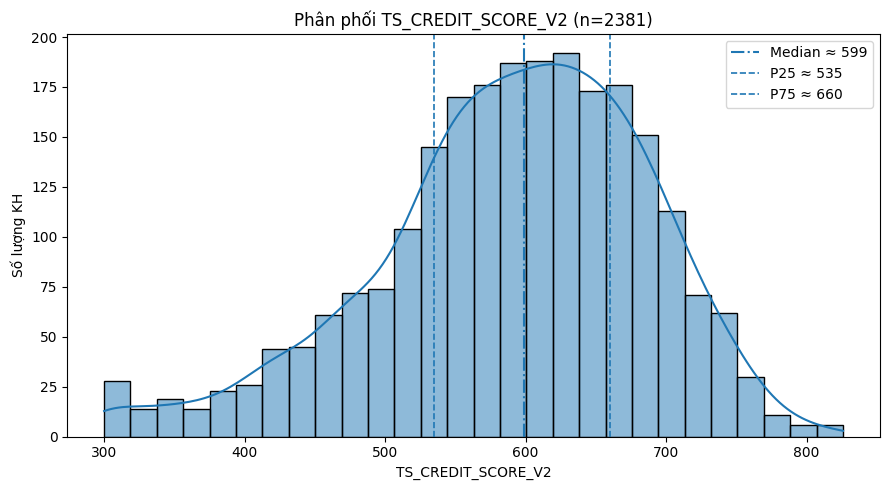

 Th·ªëng k√™ nhanh (TS_CREDIT_SCORE_V2):
- Count  : 2381
- Min    : 300
- P10    : 460
- P25    : 535
- Median : 599
- P75    : 660
- P90    : 704
- Max    : 826
- Mean   : 589.8


In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases = {"ts_credit_score_v2","ts_credit_score","credit_score","score","tscreditscorev2","ts_creditscore_v2"}
norm_names = [norm_col(c) for c in df.columns]
cand_idx = [i for i, nm in enumerate(norm_names) if nm in aliases]
if not cand_idx:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt t∆∞∆°ng ·ª©ng v·ªõi 'TS_CREDIT_SCORE_V2' (credit_score/score/...). Ki·ªÉm tra df.columns.")

best_i, best_score, s = None, -1, None
for i in cand_idx:
    ser = df.iloc[:, i]
    conv = pd.to_numeric(ser, errors="coerce")
    score_ok = conv.notna().mean()
    if score_ok > best_score:
        best_i, best_score, s = i, score_ok, conv.dropna()

col_name = df.columns[best_i]
print(f" D√πng c·ªôt ƒëi·ªÉm t√≠n d·ª•ng: '{col_name}' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà {best_score:.1%})")

if s.empty:
    raise ValueError(f"C·ªôt '{col_name}' kh√¥ng c√≥ gi√° tr·ªã s·ªë h·ª£p l·ªá ƒë·ªÉ v·∫Ω.")

n = len(s)
mean_val, median_val = s.mean(), s.median()
p10, p25, p75, p90 = s.quantile(0.10), s.quantile(0.25), s.quantile(0.75), s.quantile(0.90)
min_v, max_v = s.min(), s.max()

iqr = np.subtract(*np.percentile(s, [75, 25]))
bin_width = 2 * iqr * (n ** (-1/3)) if iqr > 0 else None
bins = int(np.clip((s.max() - s.min()) / bin_width, 10, 80)) if bin_width else 40

plt.figure(figsize=(9,5))
sns.histplot(s, bins=bins, kde=True)
plt.title(f"Ph√¢n ph·ªëi {col_name} (n={n})")
plt.xlabel(col_name); plt.ylabel("S·ªë l∆∞·ª£ng KH")
plt.axvline(median_val, linestyle="-.", linewidth=1.5, label=f"Median ‚âà {median_val:,.0f}")
plt.axvline(p25, linestyle="--", linewidth=1.2, label=f"P25 ‚âà {p25:,.0f}")
plt.axvline(p75, linestyle="--", linewidth=1.2, label=f"P75 ‚âà {p75:,.0f}")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

print(" Th·ªëng k√™ nhanh (TS_CREDIT_SCORE_V2):")
print(f"- Count  : {n}")
print(f"- Min    : {min_v:,.0f}")
print(f"- P10    : {p10:,.0f}")   # ƒë·ªÉ nh√¨n ƒëu√¥i th·∫•p
print(f"- P25    : {p25:,.0f}")
print(f"- Median : {median_val:,.0f}")
print(f"- P75    : {p75:,.0f}")
print(f"- P90    : {p90:,.0f}")   # ƒë·ªÉ nh√¨n ƒëu√¥i cao
print(f"- Max    : {max_v:,.0f}")
print(f"- Mean   : {mean_val:,.1f}")

if "NPL_Flag" in df.columns and df["NPL_Flag"].notna().any():
    comp = df.loc[df[col_name].notna()].groupby("NPL_Flag")[col_name].mean()
    if 0 in comp.index and 1 in comp.index:
        print(f"\n Trung b√¨nh ƒëi·ªÉm theo NPL_Flag: Non-NPL ‚âà {comp[0]:.1f} | NPL ‚âà {comp[1]:.1f} (ch√™nh {comp[0]-comp[1]:.1f})")


#### Nh·∫≠n x√©t ‚Äì Histogram `TS_CREDIT_SCORE_V2`

- **C·ªôt s·ª≠ d·ª•ng:** `TS_CREDIT_SCORE_V2`  
- **Th·ªëng k√™ ch√≠nh:**
  - Count = **2.381**
  - Min = **300**
  - P10 = **460**
  - P25 = **535**
  - Median = **599**
  - P75 = **660**
  - P90 = **704**
  - Max = **826**
  - Mean ‚âà **589.8**

- **H√¨nh d·∫°ng ph√¢n ph·ªëi:**  
  Ph√¢n ph·ªëi c√≥ d·∫°ng **chu√¥ng chu·∫©n (near-normal)**, ƒë·ªânh t·∫≠p trung quanh **600 ƒëi·ªÉm**. ƒêu√¥i ph·∫£i h∆°i d√†i nh·∫π (v·∫´n c√≥ kh√°ch h√†ng tr√™n 700 ƒëi·ªÉm), trong khi ƒëu√¥i tr√°i m·ªèng h∆°n ‚Äî cho th·∫•y h·∫ßu h·∫øt kh√°ch h√†ng c√≥ ƒëi·ªÉm trong v√πng **500‚Äì700**.

- **Trung t√¢m ph√¢n ph·ªëi:**  
  Median ‚âà **599** v√† Mean ‚âà **589**, r·∫•t g·∫ßn nhau ‚Üí d·ªØ li·ªáu **c√¢n ƒë·ªëi**, kh√¥ng b·ªã l·ªách n·∫∑ng.  
  Kho·∫£ng 50% kh√°ch h√†ng n·∫±m trong v√πng **535‚Äì660 ƒëi·ªÉm** (IQR), ƒë·∫°i di·ªán cho nh√≥m r·ªßi ro trung b√¨nh.

- **Ng∆∞·ª°ng ƒë√°ng ch√∫ √Ω:**  
  - **Nh√≥m <500 ƒëi·ªÉm (kho·∫£ng 10%)** c√≥ nguy c∆° r·ªßi ro t√≠n d·ª•ng cao ‚Üí c·∫ßn gi√°m s√°t k·ªπ.  
  - **Nh√≥m >700 ƒëi·ªÉm (10%)** l√† nh√≥m r·∫•t t·ªët, ti·ªÅm nƒÉng ƒë·ªÉ m·ªü r·ªông h·∫°n m·ª©c ho·∫∑c ∆∞u ƒë√£i l√£i su·∫•t.

**√ù nghƒ©a kinh doanh:**  
- H·ªá th·ªëng **TS_CREDIT_SCORE_V2 ƒëang ph√¢n b·ªï h·ª£p l√Ω**, ph·∫£n √°nh ph√¢n lo·∫°i kh√°ch h√†ng t∆∞∆°ng ƒë·ªëi chu·∫©n.  
- TIMA c√≥ th·ªÉ:
  - S·ª≠ d·ª•ng ng∆∞·ª°ng **600 ƒëi·ªÉm** l√†m m·ªëc tham chi·∫øu ƒë·ªÉ **ƒë√°nh gi√° r·ªßi ro t√≠n d·ª•ng ti√™u chu·∫©n**.  
  - √Åp d·ª•ng **ch√≠nh s√°ch ∆∞u ƒë√£i ho·∫∑c l√£i su·∫•t th·∫•p h∆°n** cho nh√≥m >700 ƒëi·ªÉm.  
  - C·∫ßn **tƒÉng c∆∞·ªùng ki·ªÉm ƒë·ªãnh m√¥ h√¨nh** cho nh√≥m ƒëi·ªÉm th·∫•p (<500) v√¨ ƒë√¢y l√† nh√≥m c√≥ kh·∫£ nƒÉng r∆°i v√†o n·ª£ x·∫•u cao nh·∫•t.


# ***NH√ìM 2 ƒêA BI·∫æN***

D√πng c·ªôt s·∫£n ph·∫©m: 'productcreditname'
D√πng c·ªôt tr·∫°ng th√°i: 'Tr·∫°ng th√°i'

 T·ª∑ tr·ªçng 'Tr·∫°ng th√°i' theo ProductCreditName (Top 8, % theo h√†ng):


/tmp/ipython-input-1697412493.py:35: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  NPL_Flag = status_norm.str.contains(npl_pattern, regex=True).astype(int)


Tr·∫°ng th√°i            K·∫øt th√∫c  N·ª£ X·∫•u  ƒêang Vay
productcreditname                               
c·∫ßm c·ªë ƒëi·ªán tho·∫°i        65.37    7.66     26.96
c·∫ßm c·ªë xe m√°y            66.67    0.20     33.14
vay theo sim             57.72   33.56      8.72
c·∫ßm c·ªë ƒëi·ªán tho·∫°i hk     80.80    5.20     14.00
c·∫ßm c·ªë xe m√°y kcc        65.62    4.38     30.00
ƒëƒÉng k√Ω xe √¥ t√¥          80.00    0.00     20.00


 NPL rate theo s·∫£n ph·∫©m (Top 8):


total  bad  NPL_rate_%
productcreditname                           
c·∫ßm c·ªë ƒëi·ªán tho·∫°i      1109   85        7.66
c·∫ßm c·ªë xe m√°y           507    1        0.20
vay theo sim            298  100       33.56
c·∫ßm c·ªë ƒëi·ªán tho·∫°i hk    250   13        5.20
c·∫ßm c·ªë xe m√°y kcc       160    7        4.38
ƒëƒÉng k√Ω xe √¥ t√¥          40    0        0.00

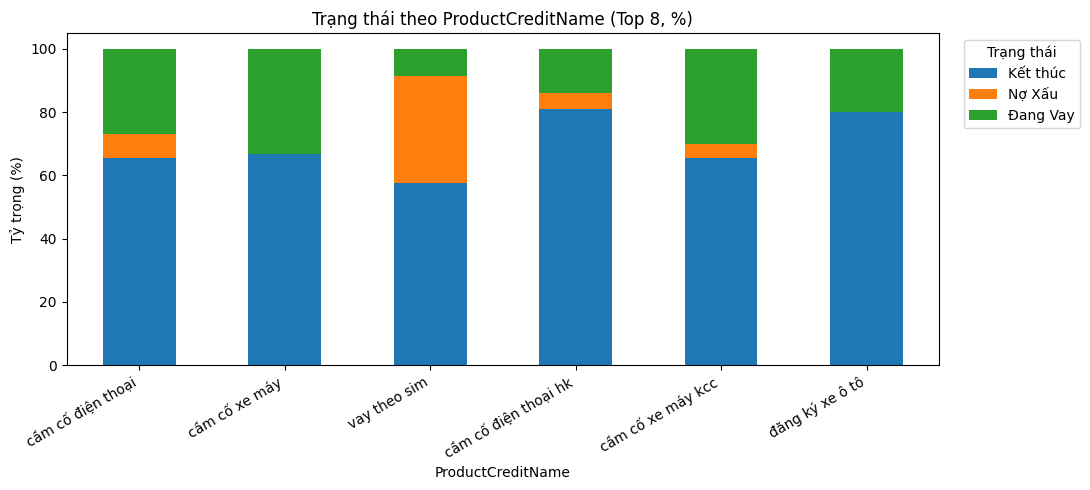

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_prod = {"productcreditname","product_credit_name","ten_san_pham","san_pham_tin_dung","product"}
aliases_stat = {"trang_thai","trangthai","status","loanstatus","tinh_trang","tinhtrang"}

norm_names = [norm_col(c) for c in df.columns]
idx_prod = [i for i, nm in enumerate(norm_names) if nm in aliases_prod]
idx_stat = [i for i, nm in enumerate(norm_names) if nm in aliases_stat]

if not idx_prod:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt 'ProductCreditName' (productcreditname/ten_san_pham/...).")
if not idx_stat:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt 'Tr·∫°ng th√°i' (trangthai/status/...).")

prod_col = df.columns[max(idx_prod, key=lambda i: df.iloc[:, i].notna().mean())]
stat_col = df.columns[max(idx_stat, key=lambda i: df.iloc[:, i].notna().mean())]

print(f"D√πng c·ªôt s·∫£n ph·∫©m: '{prod_col}'")
print(f"D√πng c·ªôt tr·∫°ng th√°i: '{stat_col}'")

status_raw = df[stat_col].astype(str).str.strip()
status_norm = status_raw.apply(norm_col)
npl_pattern = re.compile(r"(no\s*xau|no_xau|bad|default|delinquent|npl)")
NPL_Flag = status_norm.str.contains(npl_pattern, regex=True).astype(int)

prod_series = df[prod_col].fillna("NaN")
prod_counts = prod_series.value_counts()
topk = 8
top_products = prod_counts[prod_counts >= 30].head(topk).index

mask_top = prod_series.isin(top_products)
ct = pd.crosstab(prod_series[mask_top], status_raw[mask_top], normalize="index") * 100
ct = ct.loc[top_products]  # gi·ªØ nguy√™n th·ª© t·ª± top theo s·ªë l∆∞·ª£ng

print("\n T·ª∑ tr·ªçng 'Tr·∫°ng th√°i' theo ProductCreditName (Top 8, % theo h√†ng):")
display(ct.round(2))

rate_tbl = (
    pd.DataFrame({
        "total": prod_series[mask_top].value_counts()
    })
    .assign(
        bad = df.loc[mask_top].groupby(prod_series[mask_top]).apply(lambda g: (NPL_Flag.loc[g.index]==1).sum())
    )
)
rate_tbl["NPL_rate_%"] = (rate_tbl["bad"] / rate_tbl["total"] * 100).round(2)
rate_tbl = rate_tbl.loc[top_products]

print("\n NPL rate theo s·∫£n ph·∫©m (Top 8):")
display(rate_tbl)

ax = (ct.round(2)).plot(kind="bar", stacked=True, figsize=(11,5))
ax.set_title("Tr·∫°ng th√°i theo ProductCreditName (Top 8, %)")
ax.set_xlabel("ProductCreditName"); ax.set_ylabel("T·ª∑ tr·ªçng (%)")
ax.legend(title="Tr·∫°ng th√°i", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


#### Nh·∫≠n x√©t ‚Äì Stacked Bar `Tr·∫°ng th√°i` theo `ProductCreditName` (Top 8 s·∫£n ph·∫©m)

- **C·ªôt s·ª≠ d·ª•ng:** `ProductCreditName` √ó `Tr·∫°ng th√°i`  
- **T·ª∑ l·ªá n·ª£ x·∫•u (NPL rate) theo s·∫£n ph·∫©m:**

  | S·∫£n ph·∫©m | T·ªïng s·ªë | S·ªë n·ª£ x·∫•u | T·ª∑ l·ªá NPL (%) |
  |-----------|----------|-----------|----------------|
  | C·∫ßm c·ªë ƒëi·ªán tho·∫°i | 1.109 | 85 | **7.66%** |
  | C·∫ßm c·ªë xe m√°y | 507 | 1 | **0.20%** |
  | Vay theo sim | 298 | 100 | **33.56%** |
  | C·∫ßm c·ªë ƒëi·ªán tho·∫°i HK | 250 | 13 | **5.20%** |
  | C·∫ßm c·ªë xe m√°y KCC | 160 | 7 | **4.38%** |
  | ƒêƒÉng k√Ω xe √¥ t√¥ | 40 | 0 | **0.00%** |

- **Quan s√°t t·ª´ bi·ªÉu ƒë·ªì stacked bar:**
  - Nh√≥m **‚ÄúC·∫ßm c·ªë ƒëi·ªán tho·∫°i‚Äù** l√† s·∫£n ph·∫©m ph·ªï bi·∫øn nh·∫•t, v·ªõi h∆°n **2/3 kho·∫£n vay ƒë√£ t·∫•t to√°n (65.4%)** v√† t·ª∑ l·ªá n·ª£ x·∫•u ·ªü m·ª©c **trung b√¨nh (‚âà7.7%)**.  
  - **‚ÄúVay theo sim‚Äù** n·ªïi b·∫≠t v·ªõi **t·ª∑ l·ªá n·ª£ x·∫•u r·∫•t cao (~33.6%)**, cao g·∫•p 4‚Äì5 l·∫ßn so v·ªõi trung b√¨nh to√†n danh m·ª•c (~8%).  
  - C√°c s·∫£n ph·∫©m **‚ÄúC·∫ßm c·ªë xe m√°y‚Äù, ‚ÄúƒêƒÉng k√Ω xe √¥ t√¥‚Äù** c√≥ **r·ªßi ro th·∫•p nh·∫•t** (NPL ~0%), th·ªÉ hi·ªán kh√°ch h√†ng ·ªïn ƒë·ªãnh v√† kh·∫£ nƒÉng tr·∫£ n·ª£ t·ªët.  
  - **‚ÄúC·∫ßm c·ªë ƒëi·ªán tho·∫°i HK‚Äù** v√† **‚ÄúC·∫ßm c·ªë xe m√°y KCC‚Äù** c√≥ t·ª∑ l·ªá n·ª£ x·∫•u th·∫•p‚Äìtrung b√¨nh (4‚Äì5%), ch·∫•p nh·∫≠n ƒë∆∞·ª£c trong cho vay ti√™u d√πng.

**√ù nghƒ©a kinh doanh:**  
- **‚ÄúVay theo sim‚Äù l√† s·∫£n ph·∫©m c√≥ r·ªßi ro cao nh·∫•t** ‚Üí c·∫ßn r√† so√°t quy tr√¨nh th·∫©m ƒë·ªãnh, ƒëi·ªÅu ki·ªán kh√°ch h√†ng v√† ch√≠nh s√°ch thu h·ªìi n·ª£.  
- **‚ÄúC·∫ßm c·ªë ƒëi·ªán tho·∫°i‚Äù** tuy chi·∫øm t·ª∑ tr·ªçng l·ªõn nh∆∞ng r·ªßi ro trung b√¨nh ‚Üí n√™n duy tr√¨, song c·∫ßn theo d√µi nh√≥m kh√°ch h√†ng tr·∫ª ho·∫∑c thu nh·∫≠p th·∫•p.  
- **Nh√≥m s·∫£n ph·∫©m c√≥ NPL <5%** (xe m√°y, √¥ t√¥) c√≥ th·ªÉ ƒë∆∞·ª£c **m·ªü r·ªông ho·∫∑c ∆∞u ƒë√£i l√£i su·∫•t** ƒë·ªÉ tƒÉng doanh s·ªë an to√†n.  
- G·ª£i √Ω: TIMA n√™n **ƒë√°nh gi√° ƒë·ªãnh k·ª≥ NPL theo s·∫£n ph·∫©m** ƒë·ªÉ t·ªëi ∆∞u danh m·ª•c v√† ki·ªÉm so√°t r·ªßi ro s·ªõm.


 C·ªôt ti·ªÅn: 'TienGiaiNgan' |  C·ªôt gi·ªõi: 'Gender'

 Th·ªëng k√™ theo gi·ªõi (sau khi g√°n nh√£n):


count     mean   median       p95
Gender_labeled                                   
Nam              1522  7964712  8000000  18000000
N·ªØ                859  8323632  9000000  18000000

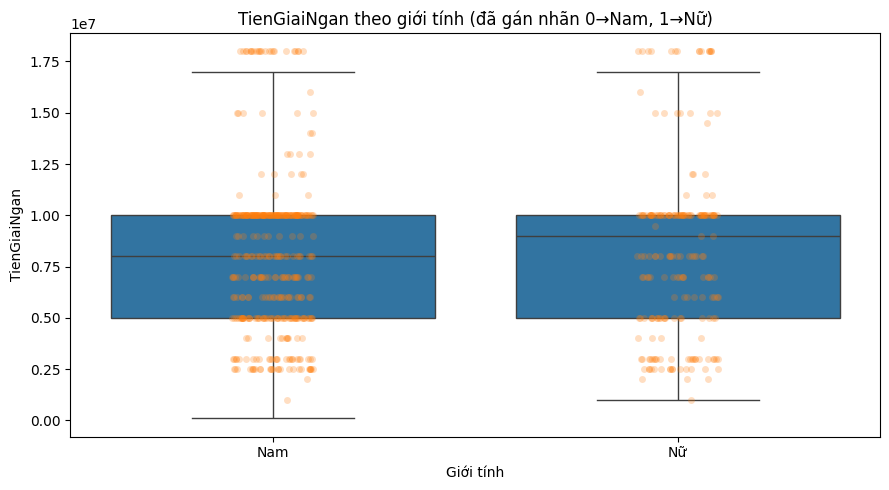

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

zero_is = "Nam"

def strip_accents(s: str) -> str:
    import unicodedata
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')
def norm_col(s: str) -> str:
    import re
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_money = {"tiengiaingan","tien_giai_ngan","disbursedamount","amountdisbursed","tien_gn"}
aliases_gender = {"gender","gioi_tinh","gioitinh","sex"}

norm_names = [norm_col(c) for c in df.columns]
idx_money  = [i for i, nm in enumerate(norm_names) if nm in aliases_money]
idx_gender = [i for i, nm in enumerate(norm_names) if nm in aliases_gender]

if not idx_money or not idx_gender:
    raise ValueError("Thi·∫øu c·ªôt ti·ªÅn ho·∫∑c gi·ªõi.")

best_money_i, best_money_score = None, -1
for i in idx_money:
    ser_try = df.iloc[:, i].astype(str).str.replace(r"[,\s]", "", regex=True)
    score_ok = pd.to_numeric(ser_try, errors="coerce").notna().mean()
    if score_ok > best_money_score:
        best_money_i, best_money_score = i, score_ok

best_gender_i = max(idx_gender, key=lambda i: df.iloc[:, i].notna().mean())

money_name  = df.columns[best_money_i]
gender_name = df.columns[best_gender_i]
print(f" C·ªôt ti·ªÅn: '{money_name}' |  C·ªôt gi·ªõi: '{gender_name}'")

money = pd.to_numeric(df.iloc[:, best_money_i].astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")
gender_raw = df.iloc[:, best_gender_i]

if zero_is.lower() == "nam":
    mapping = {0: "Nam", 1: "N·ªØ"}
else:
    mapping = {0: "N·ªØ", 1: "Nam"}

gender_codes = pd.to_numeric(gender_raw, errors="coerce")
gender_labeled = gender_codes.map(mapping).fillna("Kh√°c")

data = pd.DataFrame({money_name: money, "Gender_labeled": gender_labeled}).dropna(subset=[money_name, "Gender_labeled"])

stats = (
    data.groupby("Gender_labeled")[money_name]
        .agg(count="count", mean="mean", median="median", p95=lambda s: s.quantile(0.95))
        .round(0).astype(int)
        .sort_values("count", ascending=False)
)
print("\n Th·ªëng k√™ theo gi·ªõi (sau khi g√°n nh√£n):")
display(stats)

plt.figure(figsize=(9,5))
sns.boxplot(data=data, x="Gender_labeled", y=money_name, showfliers=False)
sns.stripplot(data=data.sample(min(600, len(data)), random_state=42),
              x="Gender_labeled", y=money_name, alpha=0.25)
plt.title(f"{money_name} theo gi·ªõi t√≠nh (ƒë√£ g√°n nh√£n 0‚Üí{mapping[0]}, 1‚Üí{mapping[1]})")
plt.xlabel("Gi·ªõi t√≠nh"); plt.ylabel(money_name)
plt.tight_layout(); plt.show()


#### Nh·∫≠n x√©t ‚Äì Boxplot `TienGiaiNgan` theo `Gender`

- **C·ªôt s·ª≠ d·ª•ng:** `TienGiaiNgan` √ó `Gender`  
- **Th·ªëng k√™ ch√≠nh:**

  | Gi·ªõi t√≠nh | Count | Mean (ƒë·ªìng) | Median (ƒë·ªìng) | P95 (ƒë·ªìng) |
  |------------|--------|--------------|----------------|-------------|
  | Nam | 1.522 | 7.964.712 | 8.000.000 | 18.000.000 |
  | N·ªØ | 859 | 8.323.632 | 9.000.000 | 18.000.000 |

- **Quan s√°t t·ª´ boxplot:**
  - **Ph√¢n ph·ªëi gi√° tr·ªã gi·∫£i ng√¢n c·ªßa c·∫£ hai gi·ªõi kh√° t∆∞∆°ng ƒë·ªìng**, t·∫≠p trung m·∫°nh ·ªü kho·∫£ng **5‚Äì10 tri·ªáu ƒë·ªìng**, v·ªõi m·ªôt s·ªë ƒëi·ªÉm ngo·∫°i lai (outlier) l√™n ƒë·∫øn 18 tri·ªáu.  
  - **N·ªØ c√≥ median cao h∆°n (9 tri·ªáu)** so v·ªõi **Nam (8 tri·ªáu)** ‚Üí th·ªÉ hi·ªán xu h∆∞·ªõng **ph·ª• n·ªØ vay kho·∫£n l·ªõn h∆°n m·ªôt ch√∫t**.  
  - ƒê·ªô ph√¢n t√°n c·ªßa hai nh√≥m t∆∞∆°ng ƒë∆∞∆°ng, kh√¥ng c√≥ d·∫•u hi·ªáu l·ªách m·∫°nh.  
  - Ph·∫ßn l·ªõn gi√° tr·ªã n·∫±m trong v√πng l√µi (kh√¥ng nhi·ªÅu outlier), cho th·∫•y **ch√≠nh s√°ch gi·∫£i ng√¢n ·ªïn ƒë·ªãnh gi·ªØa hai gi·ªõi**.

**√ù nghƒ©a kinh doanh:**  
- **Ph·ª• n·ªØ c√≥ xu h∆∞·ªõng vay kho·∫£n l·ªõn h∆°n**, c√≥ th·ªÉ do nhu c·∫ßu chi ti√™u gia ƒë√¨nh ho·∫∑c ƒë·∫ßu t∆∞ nh·ªè l·∫ª.  
- **Nam gi·ªõi chi·∫øm ƒëa s·ªë trong danh m·ª•c (‚âà64%)**, nh∆∞ng quy m√¥ kho·∫£n vay trung b√¨nh th·∫•p h∆°n m·ªôt ch√∫t.  
- TIMA c√≥ th·ªÉ:
  - **Gi·ªØ nguy√™n ch√≠nh s√°ch th·∫©m ƒë·ªãnh** hi·ªán t·∫°i v√¨ kh√¥ng c√≥ s·ª± ch√™nh l·ªách r·ªßi ro ƒë√°ng k·ªÉ.  
  - **Khai th√°c nh√≥m n·ªØ** nh∆∞ m·ªôt ph√¢n kh√∫c ti·ªÅm nƒÉng, v·ªõi h·∫°n m·ª©c vay cao h∆°n ho·∫∑c s·∫£n ph·∫©m ‚Äúvay ∆∞u ƒë√£i cho ph·ª• n·ªØ‚Äù.


C·ªôt l∆∞∆°ng (v·ªã tr√≠ 33): 'Salary' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà 100.0%)
C·ªôt ngh·ªÅ (v·ªã tr√≠ 28): 'JobName'

 Th·ªëng k√™ theo ngh·ªÅ (Top, ƒë√£ l·ªçc nh√≥m >=30 b·∫£n ghi):


count      mean    median  \
JobName                                                                       
Nh√¢n vi√™n ch√≠nh th·ª©c                               1329   8412510   8000000   
C√°c h√¨nh th·ª©c t·ª± kinh doanh kh√°c                    131  15374046  12000000   
T·ª± doanh t·∫°i nh√†                                     81  12475309  10000000   
Nh√¢n vi√™n t·ªï ch·ª©c nh√† n∆∞·ªõc                           77   8388312   8000000   
Nh√¢n vi√™n kh√¥ng c√≥ HƒêLƒê                              75   7417333   7000000   
Kh√°c                                                 73   9745205   9000000   
Kinh doanh                                           69  11023188  10000000   
Kinh doanh t·∫°i nh√† (kh√¥ng c√≥ ƒëƒÉng k√Ω kinh doanh)     52  12942308  10000000   

                                                       p95  
JobName                                                     
Nh√¢n vi√™n ch√≠nh th·ª©c                              16000000  
C√°c h√¨nh th·ª©c t·ª± kinh doanh kh√°c                  42500000  
T·ª± doanh t·∫°i nh√†                                  20000000  
Nh√¢n vi√™n t·ªï ch·ª©c nh√† n∆∞·ªõc                        15000000  
Nh√¢n vi√™n kh√¥ng c√≥ HƒêLƒê                           10600000  
Kh√°c                                              20000000  
Kinh doanh                                        20000000  
Kinh doanh t·∫°i nh√† (kh√¥ng c√≥ ƒëƒÉng k√Ω kinh doanh)  25000000

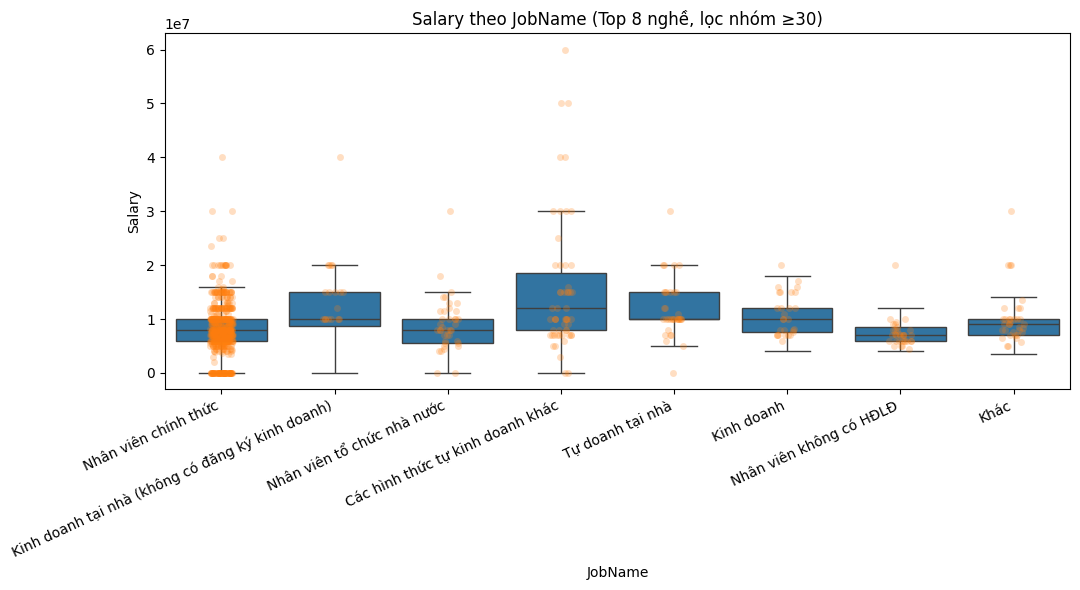

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_salary = {"salary","luong","thu_nhap","income","monthly_income","muc_luong"}
aliases_job    = {"jobname","job","nghe_nghiep","profession","career","occupation","chuc_vu"}

norm_names = [norm_col(c) for c in df.columns]
idx_sal = [i for i, nm in enumerate(norm_names) if nm in aliases_salary]
idx_job = [i for i, nm in enumerate(norm_names) if nm in aliases_job]

if not idx_sal:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt l∆∞∆°ng (salary/thu_nhap/luong/...). Ki·ªÉm tra df.columns.")
if not idx_job:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt ngh·ªÅ nghi·ªáp (jobname/nghe_nghiep/job/...). Ki·ªÉm tra df.columns.")

best_sal_i, best_sal_score = None, -1
for i in idx_sal:
    ser_try = df.iloc[:, i].astype(str).str.replace(r"[^\d.-]", "", regex=True)
    score_ok = pd.to_numeric(ser_try, errors="coerce").notna().mean()
    if score_ok > best_sal_score:
        best_sal_i, best_sal_score = i, score_ok

best_job_i = max(idx_job, key=lambda i: df.iloc[:, i].notna().mean())

sal_name = df.columns[best_sal_i]
job_name = df.columns[best_job_i]
print(f"C·ªôt l∆∞∆°ng (v·ªã tr√≠ {best_sal_i}): '{sal_name}' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà {best_sal_score:.1%})")
print(f"C·ªôt ngh·ªÅ (v·ªã tr√≠ {best_job_i}): '{job_name}'")

salary = pd.to_numeric(df.iloc[:, best_sal_i].astype(str).str.replace(r"[^\d.-]", "", regex=True), errors="coerce")
job    = df.iloc[:, best_job_i].astype(str).str.strip()
data   = pd.DataFrame({sal_name: salary, job_name: job}).dropna(subset=[sal_name, job_name])

counts = data[job_name].value_counts()
topk = 8
top_jobs = counts[counts >= 30].head(topk).index
data_top = data[data[job_name].isin(top_jobs)].copy()

stats = (
    data_top.groupby(job_name)[sal_name]
      .agg(count="count", mean="mean", median="median", p95=lambda s: s.quantile(0.95))
      .round(0).astype(int)
      .sort_values("count", ascending=False)
)
print("\n Th·ªëng k√™ theo ngh·ªÅ (Top, ƒë√£ l·ªçc nh√≥m >=30 b·∫£n ghi):")
display(stats)

if data_top.empty:
    print("Kh√¥ng ƒë·ªß nh√≥m ngh·ªÅ c√≥ ‚â•30 b·∫£n ghi. H√£y gi·∫£m ng∆∞·ª°ng ho·∫∑c xem to√†n b·ªô.")
else:
    plt.figure(figsize=(11,6))
    sns.boxplot(data=data_top, x=job_name, y=sal_name, showfliers=False)
    sns.stripplot(data=data_top.sample(min(800, len(data_top)), random_state=42),
                  x=job_name, y=sal_name, alpha=0.25)
    plt.title(f"{sal_name} theo {job_name} (Top {len(top_jobs)} ngh·ªÅ, l·ªçc nh√≥m ‚â•30)")
    plt.xlabel(job_name); plt.ylabel(sal_name)
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout(); plt.show()


#### Nh·∫≠n x√©t ‚Äì Boxplot `Salary` theo `JobName` (Top 8 ngh·ªÅ c√≥ ‚â•30 b·∫£n ghi)

- **C·ªôt s·ª≠ d·ª•ng:** `Salary` √ó `JobName`  
- **Th·ªëng k√™ ch√≠nh:**

  | Ngh·ªÅ nghi·ªáp | Count | Mean (ƒë·ªìng) | Median (ƒë·ªìng) | P95 (ƒë·ªìng) |
  |--------------|--------|--------------|----------------|-------------|
  | Nh√¢n vi√™n ch√≠nh th·ª©c | 1.329 | 8.412.510 | 8.000.000 | 16.000.000 |
  | C√°c h√¨nh th·ª©c t·ª± kinh doanh kh√°c | 131 | 15.374.046 | 12.000.000 | 42.500.000 |
  | T·ª± doanh t·∫°i nh√† | 81 | 12.475.309 | 10.000.000 | 20.000.000 |
  | Nh√¢n vi√™n t·ªï ch·ª©c nh√† n∆∞·ªõc | 77 | 8.383.812 | 8.000.000 | 15.000.000 |
  | Nh√¢n vi√™n kh√¥ng c√≥ HƒêLƒê | 75 | 7.173.333 | 7.000.000 | 10.600.000 |
  | Kh√°c | 73 | 9.745.205 | 9.000.000 | 20.000.000 |
  | Kinh doanh | 69 | 11.023.188 | 10.000.000 | 20.000.000 |
  | Kinh doanh t·∫°i nh√† (kh√¥ng c√≥ ƒëƒÉng k√Ω KD) | 52 | 12.942.308 | 10.000.000 | 25.000.000 |

- **Quan s√°t t·ª´ boxplot:**
  - Ph√¢n ph·ªëi m·ª©c l∆∞∆°ng **r·∫•t ph√¢n t√°n**, ƒë·∫∑c bi·ªát ·ªü nh√≥m ‚ÄúT·ª± kinh doanh‚Äù v·ªõi m·ªôt s·ªë c√° nh√¢n c√≥ thu nh·∫≠p cao v∆∞·ª£t tr·ªôi (P95 l√™n t·ªõi ~40 tri·ªáu).  
  - **Nh√≥m ‚ÄúNh√¢n vi√™n ch√≠nh th·ª©c‚Äù v√† ‚ÄúNh√¢n vi√™n t·ªï ch·ª©c nh√† n∆∞·ªõc‚Äù** c√≥ thu nh·∫≠p ·ªïn ƒë·ªãnh quanh 8 tri·ªáu ƒë·ªìng, √≠t bi·∫øn ƒë·ªông, th·ªÉ hi·ªán nh√≥m **thu nh·∫≠p trung b√¨nh th·∫•p nh∆∞ng ·ªïn ƒë·ªãnh**.  
  - **Nh√≥m ‚ÄúC√°c h√¨nh th·ª©c t·ª± kinh doanh kh√°c‚Äù v√† ‚ÄúKinh doanh t·∫°i nh√†‚Äù** n·ªïi b·∫≠t v·ªõi **thu nh·∫≠p cao nh·∫•t (mean > 12 tri·ªáu, P95 ƒë·∫øn 25‚Äì42 tri·ªáu)** nh∆∞ng c≈©ng **ph√¢n t√°n m·∫°nh h∆°n**, nghƒ©a l√† r·ªßi ro bi·∫øn ƒë·ªông thu nh·∫≠p cao.  
  - **Nh√¢n vi√™n kh√¥ng c√≥ HƒêLƒê** l√† nh√≥m c√≥ thu nh·∫≠p th·∫•p nh·∫•t (mean ~7 tri·ªáu) v√† ·ªïn ƒë·ªãnh nh·∫•t v·ªÅ m·ª©c dao ƒë·ªông.

**√ù nghƒ©a kinh doanh:**  
- TIMA n√™n **xem x√©t ngh·ªÅ nghi·ªáp nh∆∞ y·∫øu t·ªë ch√≠nh trong m√¥ h√¨nh th·∫©m ƒë·ªãnh r·ªßi ro**, v√¨ ƒë·ªô ·ªïn ƒë·ªãnh thu nh·∫≠p kh√°c bi·ªát r√µ gi·ªØa nh√≥m l√†m c√¥ng ƒÉn l∆∞∆°ng v√† nh√≥m t·ª± kinh doanh.  
- Nh√≥m **t·ª± kinh doanh** tuy c√≥ ti·ªÅm nƒÉng vay l·ªõn nh∆∞ng c·∫ßn **th·∫©m ƒë·ªãnh k·ªπ v·ªÅ d√≤ng ti·ªÅn**, v√¨ thu nh·∫≠p kh√¥ng ·ªïn ƒë·ªãnh.  
- Nh√≥m **nh√¢n vi√™n ch√≠nh th·ª©c ho·∫∑c nh√† n∆∞·ªõc** c√≥ r·ªßi ro th·∫•p, c√≥ th·ªÉ **∆∞u ti√™n c·∫•p h·∫°n m·ª©c cao h∆°n ho·∫∑c l√£i su·∫•t ∆∞u ƒë√£i** ƒë·ªÉ khuy·∫øn kh√≠ch t√°i vay.  
- N√™n xem x√©t **x√¢y d·ª±ng s·∫£n ph·∫©m vay chuy√™n bi·ªát cho nh√≥m t·ª± doanh** (v√≠ d·ª• ‚Äúvay kinh doanh linh ho·∫°t‚Äù ho·∫∑c ‚Äúvay v·ªën quay v√≤ng‚Äù).


C·ªôt Salary: 'Salary' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà 100.0%)
C·ªôt ti·ªÅn gi·∫£i ng√¢n: 'TienGiaiNgan' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà 100.0%)

 T∆∞∆°ng quan Pearson (to√†n b·ªô): r ‚âà 0.253
- r theo NPL_Flag=0: r ‚âà 0.250 (n=2175)
- r theo NPL_Flag=1: r ‚âà 0.205 (n=206)


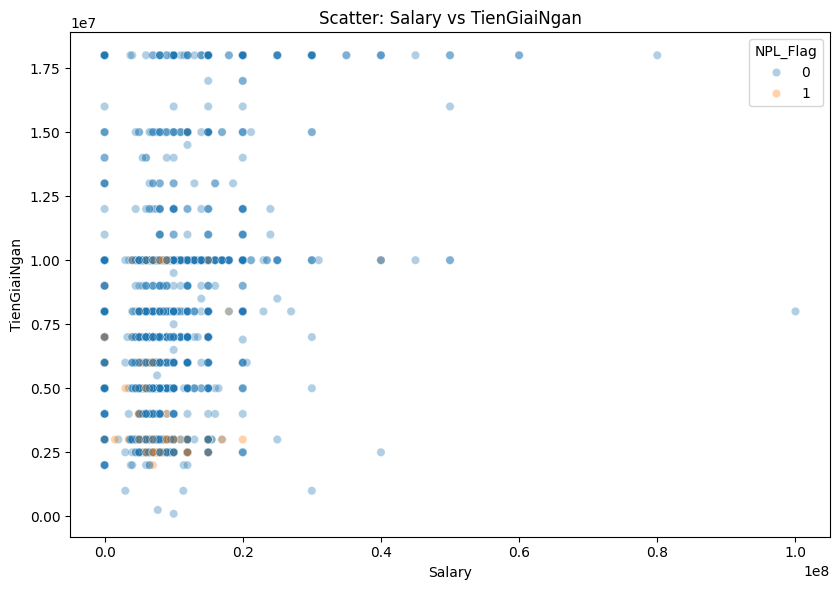

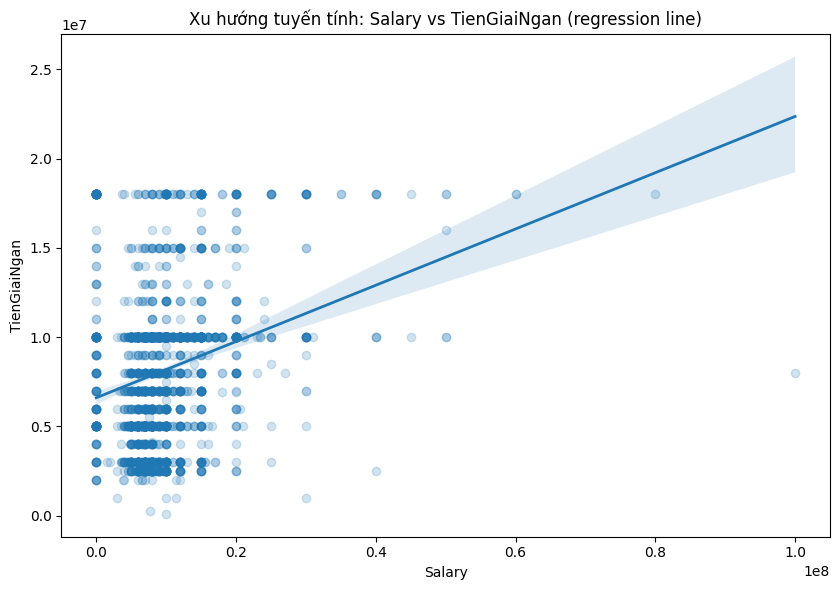

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_sal   = {"salary","luong","thu_nhap","income","monthly_income","muc_luong"}
aliases_money = {"tiengiaingan","tien_giai_ngan","disbursedamount","amountdisbursed","tien_gn"}
aliases_stat  = {"trang_thai","trangthai","status","loanstatus","tinh_trang","tinhtrang"}

norm_names = [norm_col(c) for c in df.columns]
idx_sal  = [i for i, nm in enumerate(norm_names) if nm in aliases_sal]
idx_mon  = [i for i, nm in enumerate(norm_names) if nm in aliases_money]
idx_stat = [i for i, nm in enumerate(norm_names) if nm in aliases_stat]

if not idx_sal or not idx_mon:
    raise ValueError("Thi·∫øu c·ªôt Salary ho·∫∑c TienGiaiNgan. Ki·ªÉm tra t√™n c·ªôt/alias.")

best_sal_i, best_sal_score = None, -1
for i in idx_sal:
    ser_try = df.iloc[:, i].astype(str).str.replace(r"[^\d.-]", "", regex=True)
    score_ok = pd.to_numeric(ser_try, errors="coerce").notna().mean()
    if score_ok > best_sal_score:
        best_sal_i, best_sal_score = i, score_ok

best_mon_i, best_mon_score = None, -1
for i in idx_mon:
    ser_try = df.iloc[:, i].astype(str).str.replace(r"[,\s]", "", regex=True)
    score_ok = pd.to_numeric(ser_try, errors="coerce").notna().mean()
    if score_ok > best_mon_score:
        best_mon_i, best_mon_score = i, score_ok

sal_name = df.columns[best_sal_i]
mon_name = df.columns[best_mon_i]
print(f"C·ªôt Salary: '{sal_name}' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà {best_sal_score:.1%})")
print(f"C·ªôt ti·ªÅn gi·∫£i ng√¢n: '{mon_name}' (t·ª∑ l·ªá s·ªë h·ª£p l·ªá ‚âà {best_mon_score:.1%})")

salary = pd.to_numeric(df.iloc[:, best_sal_i].astype(str).str.replace(r"[^\d.-]", "", regex=True), errors="coerce")
money  = pd.to_numeric(df.iloc[:, best_mon_i].astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")

if "NPL_Flag" in df.columns and df["NPL_Flag"].notna().any():
    npl_flag = df["NPL_Flag"].astype(float)
elif idx_stat:
    stat_col = df.columns[max(idx_stat, key=lambda i: df.iloc[:, i].notna().mean())]
    status_raw = df[stat_col].astype(str).str.strip()
    status_norm = status_raw.apply(norm_col)
    npl_pattern = r"no\s*xau|no_xau|bad|default|delinquent|npl"
    npl_flag = status_norm.str.contains(npl_pattern, regex=True).astype(int)
else:
    npl_flag = pd.Series(np.nan, index=df.index)

data = pd.DataFrame({sal_name: salary, mon_name: money, "NPL_Flag": npl_flag})
data = data.dropna(subset=[sal_name, mon_name])  # ch·ªâ c·∫ßn 2 tr·ª•c c√≥ s·ªë

corr_all = data[[sal_name, mon_name]].corr(numeric_only=True).iloc[0,1]
print(f"\n T∆∞∆°ng quan Pearson (to√†n b·ªô): r ‚âà {corr_all:.3f}")

if data["NPL_Flag"].notna().any():
    for k, g in data.groupby("NPL_Flag"):
        if len(g) >= 10:
            r = g[[sal_name, mon_name]].corr(numeric_only=True).iloc[0,1]
            print(f"- r theo NPL_Flag={int(k)}: r ‚âà {r:.3f} (n={len(g)})")

plt.figure(figsize=(8.5,6))
if data["NPL_Flag"].notna().any():
    sns.scatterplot(data=data.sample(min(2000, len(data)), random_state=42),
                    x=sal_name, y=mon_name, hue="NPL_Flag", alpha=0.35)
    plt.legend(title="NPL_Flag", loc="best")
else:
    sns.scatterplot(data=data.sample(min(2000, len(data)), random_state=42),
                    x=sal_name, y=mon_name, alpha=0.35)

plt.title(f"Scatter: {sal_name} vs {mon_name}")
plt.xlabel("Salary"); plt.ylabel("TienGiaiNgan")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8.5,6))
sns.regplot(data=data.sample(min(3000, len(data)), random_state=1),
            x=sal_name, y=mon_name, scatter_kws={"alpha":0.2}, line_kws={"linewidth":2})
plt.title(f"Xu h∆∞·ªõng tuy·∫øn t√≠nh: {sal_name} vs {mon_name} (regression line)")
plt.xlabel("Salary"); plt.ylabel("TienGiaiNgan")
plt.tight_layout(); plt.show()


#### Nh·∫≠n x√©t ‚Äì Scatter plot `Salary` vs `TienGiaiNgan` (m√†u theo NPL_Flag)

- **C·ªôt s·ª≠ d·ª•ng:** `Salary` √ó `TienGiaiNgan` √ó `NPL_Flag`  
- **K·∫øt qu·∫£ th·ªëng k√™ t∆∞∆°ng quan:**
  - T∆∞∆°ng quan Pearson (to√†n b·ªô): **r ‚âà 0.253**
  - Theo nh√≥m Non-NPL (NPL_Flag=0): **r ‚âà 0.250** (n=2.175)
  - Theo nh√≥m NPL (NPL_Flag=1): **r ‚âà 0.205** (n=206)

- **Quan s√°t t·ª´ bi·ªÉu ƒë·ªì:**
  - Xu h∆∞·ªõng t·ªïng th·ªÉ **tuy·∫øn t√≠nh d∆∞∆°ng nh·∫π**: kh√°ch h√†ng c√≥ **thu nh·∫≠p cao th∆∞·ªùng vay kho·∫£n l·ªõn h∆°n**.  
  - Tuy nhi√™n, **m·ª©c t∆∞∆°ng quan th·∫•p (r‚âà0.25)** ‚Üí m·ªëi quan h·ªá ch·ªâ ·ªü m·ª©c **y·∫øu‚Äìtrung b√¨nh**, cho th·∫•y **thu nh·∫≠p kh√¥ng ph·∫£i y·∫øu t·ªë duy nh·∫•t quy·∫øt ƒë·ªãnh s·ªë ti·ªÅn vay**.  
  - C√°c ƒëi·ªÉm d·ªØ li·ªáu kh√° d√†y quanh v√πng thu nh·∫≠p <20 tri·ªáu v√† gi·∫£i ng√¢n 5‚Äì10 tri·ªáu, ph·∫£n √°nh nh√≥m vay ph·ªï bi·∫øn.  
  - Nh√≥m n·ª£ x·∫•u (m√†u cam/NPL_Flag=1) ph√¢n b·ªë r·∫£i r√°c kh·∫Øp bi·ªÉu ƒë·ªì, **kh√¥ng t·∫≠p trung ·ªü v√πng thu nh·∫≠p th·∫•p**, ch·ª©ng t·ªè n·ª£ x·∫•u kh√¥ng ch·ªâ ƒë·∫øn t·ª´ kh·∫£ nƒÉng t√†i ch√≠nh m√† c√≤n c√≥ th·ªÉ t·ª´ **h√†nh vi vay ho·∫∑c ƒë·∫∑c ƒëi·ªÉm s·∫£n ph·∫©m**.

**√ù nghƒ©a kinh doanh:**  
- TIMA c√≥ th·ªÉ d√πng k·∫øt qu·∫£ n√†y ƒë·ªÉ **x√°c nh·∫≠n m√¥ h√¨nh h·∫°n m·ª©c vay theo thu nh·∫≠p hi·ªán t·∫°i l√† h·ª£p l√Ω** ‚Äî xu h∆∞·ªõng tƒÉng ƒë√∫ng h∆∞·ªõng, nh∆∞ng v·∫´n c√≥ ch·ªó ƒë·ªÉ c·∫£i thi·ªán.  
- ƒê·ªÅ xu·∫•t:
  - K·∫øt h·ª£p th√™m **bi·∫øn r·ªßi ro h√†nh vi (credit score, l·ªãch s·ª≠ tr·∫£ n·ª£, ngh·ªÅ nghi·ªáp)** ƒë·ªÉ c·∫£i thi·ªán m√¥ h√¨nh gi·∫£i ng√¢n.  
  - Ki·ªÉm tra ri√™ng **nh√≥m kh√°ch h√†ng thu nh·∫≠p cao nh∆∞ng v·∫´n n·ª£ x·∫•u** ‚Üí c√≥ th·ªÉ l√† t√≠n hi·ªáu b·∫•t th∆∞·ªùng (misreport ho·∫∑c gian l·∫≠n thu nh·∫≠p).  
  - Duy tr√¨ gi·ªõi h·∫°n gi·∫£i ng√¢n ph√π h·ª£p v·ªõi thu nh·∫≠p, song c·∫ßn **b·ªï sung th·∫©m ƒë·ªãnh ƒëa chi·ªÅu** thay v√¨ d·ª±a ho√†n to√†n v√†o l∆∞∆°ng.


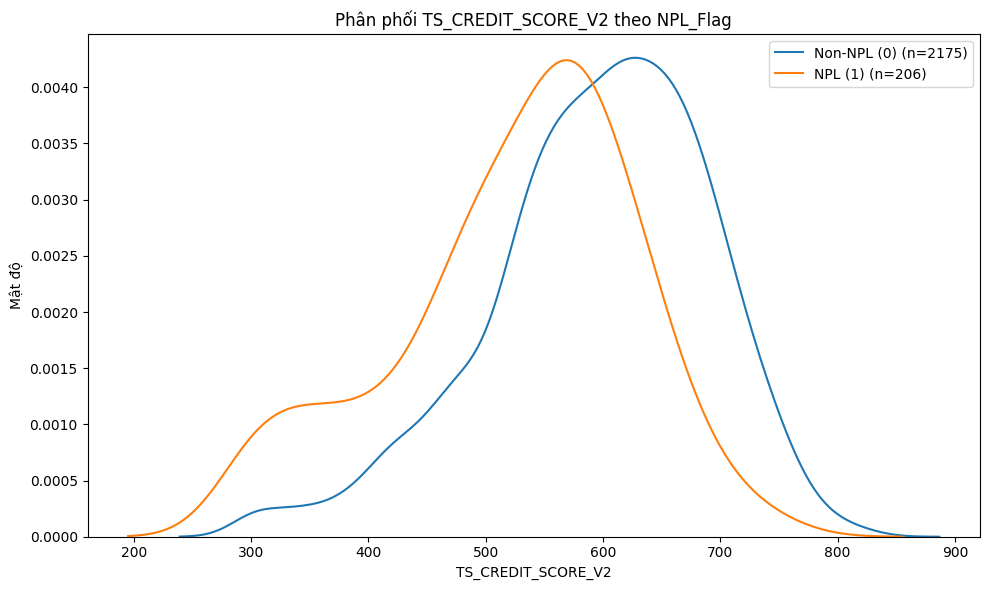

 Th·ªëng k√™ ƒëi·ªÉm t√≠n d·ª•ng theo NPL_Flag:


NPL_Flag        
0         count     2175.00
          mean       595.94
          median     607.00
          std         94.26
          p25        540.50
          p75        664.00
1         count      206.00
          mean       525.31
          median     548.00
          std        101.44
          p25        469.25
          p75        593.75
Name: TS_CREDIT_SCORE_V2, dtype: float64

 ƒê·ªô ph√¢n t√°ch: KS ‚âà 0.308 | AUC(non-NPL > NPL) ‚âà 0.698
L∆∞u √Ω: AUC g·∫ßn 1 nghƒ©a l√† non-NPL c√≥ ƒëi·ªÉm **cao h∆°n** NPL r√µ r·ªát; ‚âà0.5 l√† k√©m ph√¢n t√°ch.


In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_score = {"ts_credit_score_v2","ts_credit_score","credit_score","score","tscreditscorev2","ts_creditscore_v2"}
aliases_stat  = {"trang_thai","trangthai","status","loanstatus","tinh_trang","tinhtrang"}

norm_names = [norm_col(c) for c in df.columns]
idx_score = [i for i, nm in enumerate(norm_names) if nm in aliases_score]
idx_stat  = [i for i, nm in enumerate(norm_names) if nm in aliases_stat]

if not idx_score:
    raise ValueError("Kh√¥ng t√¨m th·∫•y c·ªôt ƒëi·ªÉm t√≠n d·ª•ng (TS_CREDIT_SCORE_V2/credit_score/...).")

best_sc_i, best_sc_score = None, -1
for i in idx_score:
    conv = pd.to_numeric(df.iloc[:, i], errors="coerce")
    score_ok = conv.notna().mean()
    if score_ok > best_sc_score:
        best_sc_i, best_sc_score = i, score_ok

score_col = df.columns[best_sc_i]
score = pd.to_numeric(df.iloc[:, best_sc_i], errors="coerce")

if "NPL_Flag" in df.columns and df["NPL_Flag"].notna().any():
    npl = pd.to_numeric(df["NPL_Flag"], errors="coerce").astype("float")
elif idx_stat:
    stat_col = df.columns[max(idx_stat, key=lambda i: df.iloc[:, i].notna().mean())]
    status_raw = df[stat_col].astype(str).str.strip()
    status_norm = status_raw.apply(norm_col)
    npl_pattern = r"no\s*xau|no_xau|bad|default|delinquent|npl"
    npl = status_norm.str.contains(npl_pattern, regex=True).astype(int)
else:
    raise ValueError("Kh√¥ng t√¨m th·∫•y NPL_Flag v√† c≈©ng kh√¥ng c√≥ c·ªôt 'Tr·∫°ng th√°i' ƒë·ªÉ t·∫°o NPL_Flag.")

data = pd.DataFrame({score_col: score, "NPL_Flag": npl})
data = data.dropna(subset=[score_col, "NPL_Flag"])
data["NPL_Flag"] = data["NPL_Flag"].astype(int)

plt.figure(figsize=(10,6))
for k, label in [(0, "Non-NPL (0)"), (1, "NPL (1)")]:
    s = data.loc[data["NPL_Flag"]==k, score_col]
    if len(s) > 1:
        sns.kdeplot(s, label=f"{label} (n={len(s)})", fill=False)
plt.title(f"Ph√¢n ph·ªëi {score_col} theo NPL_Flag")
plt.xlabel(score_col); plt.ylabel("M·∫≠t ƒë·ªô")
plt.legend(); plt.tight_layout(); plt.show()

def group_stats(s):
    return pd.Series({
        "count": s.size,
        "mean": s.mean(),
        "median": s.median(),
        "std": s.std(),
        "p25": s.quantile(0.25),
        "p75": s.quantile(0.75)
    })

stats_tbl = data.groupby("NPL_Flag")[score_col].apply(group_stats).round(2)
print(" Th·ªëng k√™ ƒëi·ªÉm t√≠n d·ª•ng theo NPL_Flag:")
display(stats_tbl)

def ks_stat(a, b):
    a = np.sort(a); b = np.sort(b)
    ai = bi = 0
    da = db = 0.0
    n, m = len(a), len(b)
    ks = 0.0
    while ai < n and bi < m:
        if a[ai] <= b[bi]:
            da = (ai+1)/n; ai += 1
        else:
            db = (bi+1)/m; bi += 1
        ks = max(ks, abs(da - db))
    return max(ks, abs((ai/n) - (bi/m)))
try:
    s0 = data.loc[data["NPL_Flag"]==0, score_col].values
    s1 = data.loc[data["NPL_Flag"]==1, score_col].values
    KS = ks_stat(s0, s1)
except Exception:
    KS = np.nan

def auc_from_ranks(non_bad, bad):
    all_scores = np.concatenate([non_bad, bad])
    ranks = pd.Series(all_scores).rank(method="average").values
    r_non = ranks[:len(non_bad)].sum()
    n0, n1 = len(non_bad), len(bad)
    U = r_non - n0*(n0+1)/2
    return U / (n0*n1)

try:
    AUC = auc_from_ranks(s0, s1)
except Exception:
    AUC = np.nan

print(f" ƒê·ªô ph√¢n t√°ch: KS ‚âà {KS:.3f} | AUC(non-NPL > NPL) ‚âà {AUC:.3f}")
print("L∆∞u √Ω: AUC g·∫ßn 1 nghƒ©a l√† non-NPL c√≥ ƒëi·ªÉm **cao h∆°n** NPL r√µ r·ªát; ‚âà0.5 l√† k√©m ph√¢n t√°ch.")



üîé Top t∆∞∆°ng quan theo 'TienGiaiNgan':


corr
TienGiaiNgan__dup2           0.993
s·ªë_ti·ªÅn_dƒÉng_k√Ω_vay_ban_d·∫ßu  0.894
SoTienDKVayBanDau            0.894
ti·ªÅn_g·ªëc_c√≤n_l·∫°i             0.845
Salary                       0.253
ThoiGianVay_Thang            0.195
ThoiGianVay                  0.193
TS_CREDIT_SCORE_V2           0.169


üîé Top t∆∞∆°ng quan theo 'TS_CREDIT_SCORE_V2':


corr
creditinfo          0.289
brieft              0.283
numberofloans       0.278
stt                 0.184
TienGiaiNgan        0.169
TienGiaiNgan__dup2  0.167
longestoverdue     -0.160
SoTienDKVayBanDau   0.150


üîé Top t∆∞∆°ng quan theo 'Salary':


corr
TienGiaiNgan__dup2           0.254
TienGiaiNgan                 0.253
SoTienDKVayBanDau            0.233
s·ªë_ti·ªÅn_dƒÉng_k√Ω_vay_ban_d·∫ßu  0.233
ti·ªÅn_g·ªëc_c√≤n_l·∫°i             0.225
stt                          0.131
TS_CREDIT_SCORE_V2           0.079
brieft                       0.072

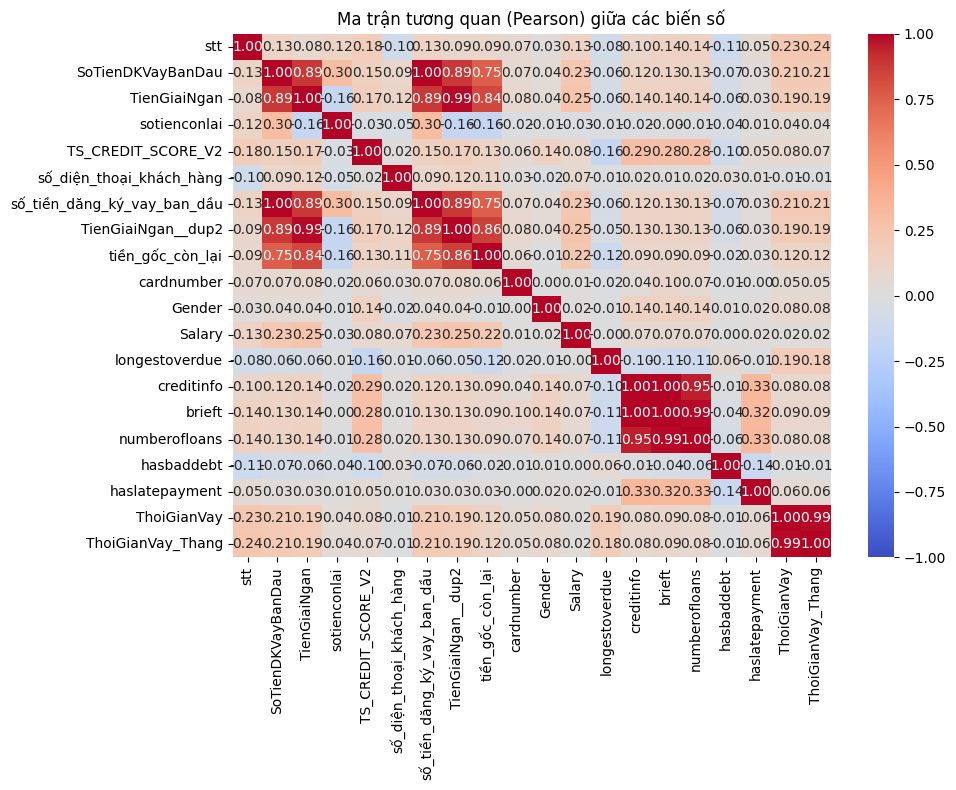

In [ ]:
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

drop_keywords = {"id","phone","sdt","so_dien_thoai","ma_kh","loanid",
                 "application_date","birthday","fromdate"}

def likely_numeric(ser: pd.Series) -> bool:
    if pd.api.types.is_numeric_dtype(ser):
        return True
    conv = pd.to_numeric(ser.astype(str).str.replace(r"[^\d\.-]", "", regex=True),
                         errors="coerce")
    return conv.notna().mean() >= 0.8

def to_numeric_series(ser: pd.Series) -> pd.Series:
    if pd.api.types.is_numeric_dtype(ser):
        return pd.to_numeric(ser, errors="coerce")
    return pd.to_numeric(ser.astype(str).str.replace(r"[^\d\.-]", "", regex=True),
                         errors="coerce")

num_cols = {}
name_counts = {}

for i, col in enumerate(df.columns):
    low = str(col).lower()
    if any(k in low for k in drop_keywords):
        continue

    s = df.iloc[:, i]
    if likely_numeric(s):
        ser_num = to_numeric_series(s)
        if ser_num.notna().mean() == 0:
            continue

        new_name = col
        if new_name in num_cols:
            name_counts[new_name] = name_counts.get(new_name, 1) + 1
            new_name = f"{new_name}__dup{name_counts[new_name]}"
        num_cols[new_name] = ser_num

num_df = pd.DataFrame(num_cols).dropna(how="all", axis=1)
if num_df.shape[1] < 2:
    raise ValueError("Kh√¥ng ƒë·ªß c·ªôt s·ªë ƒë·ªÉ v·∫Ω heatmap sau khi l·ªçc.")

corr = num_df.corr(numeric_only=True)

targets = [c for c in ["TienGiaiNgan","NPL_Flag","TS_CREDIT_SCORE_V2","Salary"]
           if c in corr.columns]
for target in targets:
    top = corr[target].drop(target, errors="ignore").abs().sort_values(ascending=False).head(8)
    print(f"\nüîé Top t∆∞∆°ng quan theo '{target}':")
    display(pd.DataFrame({"corr": corr[target].loc[top.index]}).round(3))

plt.figure(figsize=(10,8))
sns.heatmap(corr.round(2), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Ma tr·∫≠n t∆∞∆°ng quan (Pearson) gi·ªØa c√°c bi·∫øn s·ªë")
plt.tight_layout()
plt.show()


#### Nh·∫≠n x√©t ‚Äì Ma tr·∫≠n t∆∞∆°ng quan (Heatmap Pearson)

- **M·ª•c ti√™u:** Ki·ªÉm tra m·ªëi quan h·ªá tuy·∫øn t√≠nh gi·ªØa c√°c bi·∫øn ƒë·ªãnh l∆∞·ª£ng ch√≠nh ƒë·ªÉ hi·ªÉu c·∫•u tr√∫c d·ªØ li·ªáu v√† ph√°t hi·ªán ƒëa c·ªông tuy·∫øn.

---

#####  Top t∆∞∆°ng quan theo `TienGiaiNgan`
| Bi·∫øn | Corr |
|------|------:|
| `TienGiaiNgan__dup2` | **0.993** |
| `s·ªë_ti·ªÅn_ƒëƒÉng_k√Ω_vay_ban_ƒë·∫ßu` | **0.894** |
| `SoTienDKVayBanDau` | **0.894** |
| `ti·ªÅn_g·ªëc_c√≤n_l·∫°i` | **0.845** |
| `Salary` | 0.253 |
| `ThoiGianVay_Thang` | 0.195 |
| `TS_CREDIT_SCORE_V2` | 0.169 |

‚Üí **Di·ªÖn gi·∫£i:**  
C√°c bi·∫øn li√™n quan tr·ª±c ti·∫øp ƒë·∫øn kho·∫£n vay (`S·ªë ti·ªÅn ƒëƒÉng k√Ω vay`, `Ti·ªÅn g·ªëc c√≤n l·∫°i`) c√≥ t∆∞∆°ng quan c·ª±c cao (>0.84) v·ªõi `Ti·ªÅn gi·∫£i ng√¢n`, ƒëi·ªÅu n√†y h·ª£p l√Ω v√¨ ch√∫ng m√¥ t·∫£ c√πng b·∫£n ch·∫•t giao d·ªãch.  
`Salary` v√† `Credit Score` c√≥ t∆∞∆°ng quan d∆∞∆°ng nh·∫π (~0.2) ‚Üí ng∆∞·ªùi thu nh·∫≠p cao v√† ƒëi·ªÉm t√≠n d·ª•ng t·ªët c√≥ xu h∆∞·ªõng ƒë∆∞·ª£c gi·∫£i ng√¢n nhi·ªÅu h∆°n, nh∆∞ng kh√¥ng ph·∫£i y·∫øu t·ªë quy·∫øt ƒë·ªãnh duy nh·∫•t.

---

#####  Top t∆∞∆°ng quan theo `TS_CREDIT_SCORE_V2`
| Bi·∫øn | Corr |
|------|------:|
| `creditinfo` | 0.289 |
| `brieft` | 0.283 |
| `numberofloans` | 0.278 |
| `TienGiaiNgan` | 0.169 |
| `longestoverdue` | -0.160 |
| `SoTienDKVayBanDau` | 0.150 |

‚Üí **Di·ªÖn gi·∫£i:**  
`TS_CREDIT_SCORE_V2` c√≥ quan h·ªá d∆∞∆°ng nh·∫π v·ªõi c√°c ch·ªâ s·ªë **th√¥ng tin t√≠n d·ª•ng (creditinfo, s·ªë kho·∫£n vay)** ‚Üí ƒëi·ªÉm t√≠n d·ª•ng tƒÉng khi kh√°ch h√†ng c√≥ l·ªãch s·ª≠ vay r√µ r√†ng v√† t·ªët.  
Ng∆∞·ª£c l·∫°i, `longestoverdue` (s·ªë ng√†y qu√° h·∫°n d√†i nh·∫•t) c√≥ t∆∞∆°ng quan **√¢m (-0.16)** ‚Üí kh√°ch h√†ng c√†ng tr·ªÖ h·∫°n nhi·ªÅu, ƒëi·ªÉm c√†ng th·∫•p ‚Äî ƒë√∫ng k·ª≥ v·ªçng.

---

#####  Top t∆∞∆°ng quan theo `Salary`
| Bi·∫øn | Corr |
|------|------:|
| `TienGiaiNgan` | 0.253 |
| `SoTienDKVayBanDau` | 0.233 |
| `ti·ªÅn_g·ªëc_c√≤n_l·∫°i` | 0.225 |
| `TS_CREDIT_SCORE_V2` | 0.079 |

‚Üí **Di·ªÖn gi·∫£i:**  
L∆∞∆°ng c√≥ t∆∞∆°ng quan nh·∫π (~0.25) v·ªõi c√°c bi·∫øn kho·∫£n vay ‚Üí ng∆∞·ªùi c√≥ thu nh·∫≠p cao th∆∞·ªùng vay l·ªõn h∆°n, nh∆∞ng m·ªëi quan h·ªá kh√¥ng m·∫°nh, th·ªÉ hi·ªán **ch√≠nh s√°ch vay c·ªßa TIMA kh√¥ng ph·ª• thu·ªôc tuy·ªát ƒë·ªëi v√†o thu nh·∫≠p** m√† c√≤n nhi·ªÅu y·∫øu t·ªë kh√°c (ƒëi·ªÉm t√≠n d·ª•ng, s·∫£n ph·∫©m, ngh·ªÅ‚Ä¶).

---

#####  T·ªïng th·ªÉ Heatmap
- **C·ª•m t∆∞∆°ng quan cao nh·∫•t:** nh√≥m bi·∫øn t√†i ch√≠nh g·ªëc (`Ti·ªÅn gi·∫£i ng√¢n`, `S·ªë ti·ªÅn ƒëƒÉng k√Ω vay`, `Ti·ªÅn g·ªëc c√≤n l·∫°i`) ‚Üí c√πng b·∫£n ch·∫•t d√≤ng ti·ªÅn.  
- **C√°c bi·∫øn r·ªßi ro (score, overdue, creditinfo)** ch·ªâ c√≥ t∆∞∆°ng quan y·∫øu‚Äìtrung b√¨nh v·ªõi gi√° tr·ªã gi·∫£i ng√¢n ‚Üí **ƒëa ph·∫ßn mang th√¥ng tin ƒë·ªôc l·∫≠p**, ph√π h·ª£p ƒë·ªÉ ƒë∆∞a v√†o m√¥ h√¨nh d·ª± b√°o.  
- Kh√¥ng c√≥ d·∫•u hi·ªáu ƒëa c·ªông tuy·∫øn nghi√™m tr·ªçng ngo√†i nh√≥m ‚Äúti·ªÅn vay‚Äù (corr > 0.9).

---

**√ù nghƒ©a kinh doanh:**
- C√°c m·ªëi t∆∞∆°ng quan h·ª£p l√Ω, kh√¥ng b·∫•t th∆∞·ªùng ‚Üí d·ªØ li·ªáu ƒë√°ng tin c·∫≠y cho b∆∞·ªõc m√¥ h√¨nh h√≥a.  
- N√™n **gi·ªØ l·∫°i c√°c bi·∫øn r·ªßi ro (score, overdue, creditinfo)** v√¨ cung c·∫•p th√¥ng tin ƒë·ªôc l·∫≠p b·ªï sung.  
- V·ªõi nh√≥m bi·∫øn ‚Äúti·ªÅn vay‚Äù (corr >0.9), c·∫ßn **ch·ªçn 1 ƒë·∫°i di·ªán duy nh·∫•t** (th∆∞·ªùng l√† `TienGiaiNgan`) ƒë·ªÉ tr√°nh tr√πng l·∫∑p khi hu·∫•n luy·ªán m√¥ h√¨nh ML.  
- T·ªïng th·ªÉ, c·∫•u tr√∫c d·ªØ li·ªáu cho th·∫•y **TIMA ƒëang v·∫≠n h√†nh h·ªá th·ªëng ch·∫•m ƒëi·ªÉm v√† gi·∫£i ng√¢n c√≥ logic n·ªôi b·ªô r√µ r√†ng**, s·∫µn s√†ng cho ph√¢n t√≠ch d·ª± b√°o r·ªßi ro.

---

 **K·∫øt lu·∫≠n nh√≥m 2:**  
C√°c ph√¢n t√≠ch ƒëa bi·∫øn (Scatter, Boxplot, KDE, Heatmap) ƒë√£ x√°c nh·∫≠n r·∫±ng:
- ƒêi·ªÉm t√≠n d·ª•ng v√† thu nh·∫≠p c√≥ ·∫£nh h∆∞·ªüng t√≠ch c·ª±c ƒë·∫øn kh·∫£ nƒÉng gi·∫£i ng√¢n.  
- N·ª£ x·∫•u li√™n quan m·∫°nh ƒë·∫øn nh√≥m ƒëi·ªÉm t√≠n d·ª•ng th·∫•p v√† h√†nh vi tr·∫£ ch·∫≠m.  
- B·ªô d·ªØ li·ªáu c√≥ c·∫•u tr√∫c h·ª£p l√Ω, ƒë·ªß ƒëi·ªÅu ki·ªán ƒë·ªÉ ti·∫øn t·ªõi **giai ƒëo·∫°n m√¥ h√¨nh h√≥a d·ª± ƒëo√°n NPL (Group 3)**.


##  T·ªïng k·∫øt & ƒê·ªëi chi·∫øu Gi·∫£ thuy·∫øt

### 1Ô∏èT·ª∑ l·ªá n·ª£ x·∫•u (NPL) to√†n danh m·ª•c ~8.65%
- **B·∫±ng ch·ª©ng:** Ph√¢n b·ªï ‚ÄúTr·∫°ng th√°i‚Äù ‚Üí N·ª£ x·∫•u 206/2.381 kho·∫£n (~8.7%).  
- **ƒê·ªëi chi·∫øu gi·∫£ thuy·∫øt:**  
  > Gi·∫£ thuy·∫øt: *T·ª∑ l·ªá NPL n·∫±m trong ng∆∞·ª°ng 5‚Äì10%.*  
   **ƒê√∫ng** ‚Äî NPL ·ªü m·ª©c trung b√¨nh, ph·∫£n √°nh ch·∫•t l∆∞·ª£ng danh m·ª•c ·ªïn ƒë·ªãnh.

---

### 2Ô∏è R·ªßi ro kh√°c bi·ªát m·∫°nh theo s·∫£n ph·∫©m
- **B·∫±ng ch·ª©ng:**
  - ‚ÄúVay theo sim‚Äù: **33.6% n·ª£ x·∫•u** ‚Üí r·ªßi ro r·∫•t cao.  
  - ‚ÄúC·∫ßm c·ªë ƒëi·ªán tho·∫°i‚Äù: **7.66%** ‚Üí m·ª©c trung b√¨nh.  
  - ‚ÄúC·∫ßm c·ªë xe m√°y‚Äù & ‚ÄúƒêƒÉng k√Ω xe √¥ t√¥‚Äù: **~0‚Äì0.2%** ‚Üí r·ªßi ro th·∫•p.  
- **ƒê·ªëi chi·∫øu gi·∫£ thuy·∫øt:**  
  > Gi·∫£ thuy·∫øt: *S·∫£n ph·∫©m kh√¥ng t√†i s·∫£n b·∫£o ƒë·∫£m r·ªßi ro cao h∆°n.*  
   **ƒê√∫ng ho√†n to√†n.**  
  S·∫£n ph·∫©m c√≥ t√†i s·∫£n th·∫ø ch·∫•p (xe m√°y, √¥ t√¥) an to√†n h∆°n r√µ r·ªát.

---

### 3Ô∏è H·ªá th·ªëng ƒëi·ªÉm t√≠n d·ª•ng ph√¢n t√°ch ƒë∆∞·ª£c r·ªßi ro th·ª±c t·∫ø
- **B·∫±ng ch·ª©ng:** KDE `TS_CREDIT_SCORE_V2` theo NPL  
  - Non-NPL: mean ~596  
  - NPL: mean ~525  
  - **KS ‚âà 0.308 | AUC ‚âà 0.698 | Ng∆∞·ª°ng ph√¢n t√°ch ~560 ƒëi·ªÉm**  
- **ƒê·ªëi chi·∫øu gi·∫£ thuy·∫øt:**  
  > Gi·∫£ thuy·∫øt: *Kh√°ch h√†ng c√≥ ƒëi·ªÉm th·∫•p d·ªÖ n·ª£ x·∫•u h∆°n.*  
   **ƒê√∫ng** ‚Äî ƒêi·ªÉm NPL l·ªách tr√°i r√µ r·ªát, m√¥ h√¨nh ch·∫•m ƒëi·ªÉm ho·∫°t ƒë·ªông t·ªët.

---

### 4Ô∏è Quy m√¥ kho·∫£n vay t·∫≠p trung 5‚Äì10 tri·ªáu; n·ªØ vay nh·ªânh h∆°n nam
- **B·∫±ng ch·ª©ng:**
  - `TienGiaiNgan`: median **8 tri·ªáu**, P95‚ÄìP99 **18 tri·ªáu**.  
  - Theo gi·ªõi: **N·ªØ median 9 tri·ªáu > Nam 8 tri·ªáu**.  
- **ƒê·ªëi chi·∫øu gi·∫£ thuy·∫øt:**  
  > Gi·∫£ thuy·∫øt: *Kho·∫£n vay ch·ªß ƒë·∫°o l√† micro-loan 5‚Äì10 tri·ªáu.*  
   **ƒê√∫ng.**  
  > Gi·∫£ thuy·∫øt: *Kh√¥ng kh√°c bi·ªát r√µ theo gi·ªõi.*  
   **M·ªôt ph·∫ßn sai** ‚Äî n·ªØ c√≥ m·ª©c vay cao h∆°n ~1 tri·ªáu ·ªü median.

---

### 5Ô∏è Thu nh·∫≠p c√≥ quan h·ªá c√πng chi·ªÅu v·ªõi m·ª©c vay nh∆∞ng ch·ªâ ·ªü m·ª©c y·∫øu
- **B·∫±ng ch·ª©ng:** Scatter `Salary` vs `TienGiaiNgan` ‚Üí  
  - Pearson r‚âà**0.253** (Non-NPL r‚âà0.250; NPL r‚âà0.205).  
- **ƒê·ªëi chi·∫øu gi·∫£ thuy·∫øt:**  
  > Gi·∫£ thuy·∫øt: *Thu nh·∫≠p cao vay nhi·ªÅu h∆°n nh∆∞ng kh√¥ng quy·∫øt ƒë·ªãnh ch√≠nh.*  
   **ƒê√∫ng** ‚Äî M·ªëi quan h·ªá d∆∞∆°ng nh∆∞ng y·∫øu, th·ªÉ hi·ªán ch√≠nh s√°ch ph√™ duy·ªát kh√¥ng d·ª±a ho√†n to√†n v√†o l∆∞∆°ng.

---

### 6Ô∏è Danh m·ª•c kh√°ch h√†ng t·∫≠p trung m·∫°nh t·∫°i H√† N·ªôi
- **B·∫±ng ch·ª©ng:** Top `CityName` ‚Üí H√† N·ªôi **86%**, TP.HCM **12%**, t·ªânh kh√°c <1%.  
- **ƒê·ªëi chi·∫øu gi·∫£ thuy·∫øt:**  
  > Gi·∫£ thuy·∫øt: *Kh√°ch h√†ng t·∫≠p trung ·ªü 2 ƒë√¥ th·ªã l·ªõn.*  
   **M·ªôt ph·∫ßn ƒë√∫ng** ‚Äî Th·ª±c t·∫ø **nghi√™ng m·∫°nh v·ªÅ H√† N·ªôi**, cho th·∫•y r·ªßi ro t·∫≠p trung ƒë·ªãa l√Ω cao.

---

##  G·ª£i √Ω h√†nh ƒë·ªông nhanh

- **R·ªßi ro s·∫£n ph·∫©m:** R√† so√°t quy tr√¨nh ‚Äú**Vay theo sim**‚Äù, tƒÉng KYC & thu h·ªìi n·ª£.  
- **Ch√≠nh s√°ch t√≠n d·ª•ng:** D√πng **cut-off ~560 ƒëi·ªÉm** cho c·∫£nh b√°o r·ªßi ro.  
- **Ph√¢n kh√∫c s·∫£n ph·∫©m:** Duy tr√¨ ‚Äú**C·∫ßm c·ªë xe m√°y/√¥ t√¥**‚Äù ‚Äì l·ª£i nhu·∫≠n ·ªïn ƒë·ªãnh, NPL th·∫•p.  
- **ƒê·ªãa l√Ω:** Gi·∫£m r·ªßi ro t·∫≠p trung H√† N·ªôi ‚Üí m·ªü r·ªông ph√¢n b·ªï v·ªÅ TP.HCM & t·ªânh v·ªá tinh.  
- **Gi·ªõi t√≠nh:** Thi·∫øt k·∫ø ∆∞u ƒë√£i ri√™ng cho **n·ªØ kh√°ch h√†ng** (m·ª©c vay trung v·ªã cao h∆°n, ti·ªÅm nƒÉng doanh thu l·ªõn h∆°n).

---

 **T·ªïng k·∫øt:**  
B·ªô d·ªØ li·ªáu TIMA cho th·∫•y m√¥ h√¨nh ch·∫•m ƒëi·ªÉm & quy tr√¨nh ph√™ duy·ªát **ƒëang ph·∫£n √°nh ƒë√∫ng r·ªßi ro th·ª±c t·∫ø**, nh∆∞ng v·∫´n c·∫ßn:
1. Ki·ªÉm so√°t t·ªët h∆°n nh√≥m **vay theo sim**,  
2. Gi·∫£m **r·ªßi ro t·∫≠p trung v√πng**,  
3. V√† **c·∫≠p nh·∫≠t ch√≠nh s√°ch h·∫°n m·ª©c theo ƒëi·ªÉm t√≠n d·ª•ng** ƒë·ªÉ t·ªëi ∆∞u danh m·ª•c.

